# 1. 탐색적 데이터 분석

In [ ]:
import pandas as pd
from scipy.stats import trim_mean

state = pd.read_csv('./data/state.csv')

In [ ]:
state['Population'].mean()

6162876.3

In [ ]:
trim_mean(state['Population'], 0.1)

4783697.125

In [ ]:
state['Population'].median()

4436369.5

In [ ]:
state

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA
5,Colorado,5029196,2.8,CO
6,Connecticut,3574097,2.4,CT
7,Delaware,897934,5.8,DE
8,Florida,18801310,5.8,FL
9,Georgia,9687653,5.7,GA


In [ ]:
!pip install wquantiles


[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import numpy as np
import wquantiles

np.average(state['Murder.Rate'], weights=state['Population'])

4.445833981123393

In [ ]:
wquantiles.median(state['Murder.Rate'], weights=state['Population'])

4.4

In [ ]:
!pip install statsmodels

     ---------------------------------------- 9.9/9.9 MB 2.8 MB/s eta 0:00:00
     -------------------------------------- 232.9/232.9 kB 2.9 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from statsmodels import robust

state['Population'].std()

6848235.347401142

In [ ]:
state['Population'].quantile(0.75) - state['Population'].quantile(0.25)

4847308.0

In [ ]:
robust.scale.mad(state['Population'])

3849876.1459979336

In [ ]:
state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

Text(0, 0.5, 'Population (millions)')

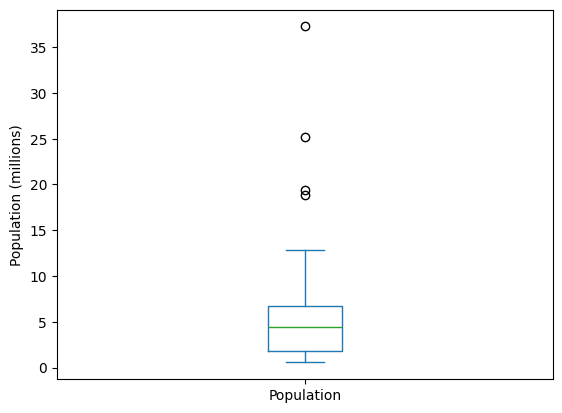

In [ ]:
ax = (state['Population']/1_000_000).plot.box()
ax.set_ylabel('Population (millions)')

In [ ]:
a = 1_000_000

In [ ]:
binnedPopulation = pd.cut(state['Population'], 10)
binnedPopulation.value_counts()

Population
(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: count, dtype: int64

Text(0.5, 0, 'Population (millions)')

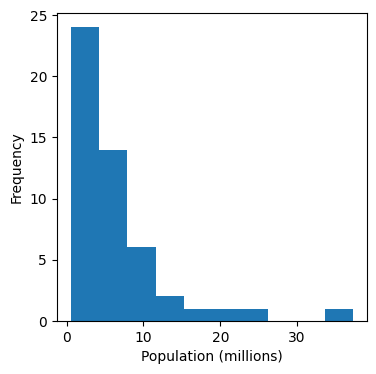

In [ ]:
ax = (state['Population'] / 1_000_000).plot.hist(figsize=(4, 4))
ax.set_xlabel('Population (millions)')

Text(0.5, 0, 'Murder Rate (per 100,000)')

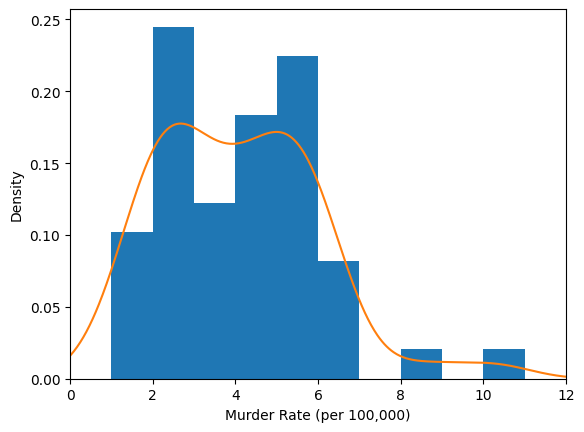

In [ ]:
ax = state['Murder.Rate'].plot.hist(density=True, xlim=[0, 12], bins=range(1, 12))
state['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 100,000)')

Text(0, 0.5, 'Count')

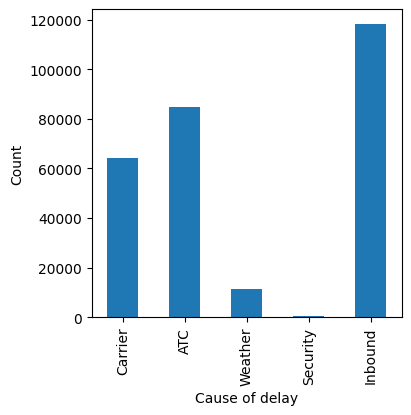

In [ ]:
dfw = pd.read_csv('./data/dfw_airline.csv')
ax = dfw.transpose().plot.bar(figsize=(4,4), legend=False)
ax.set_xlabel('Cause of delay')
ax.set_ylabel('Count')

In [ ]:
import pandas as pd
import seaborn as sns

sp500_px = pd.read_csv('./data/sp500_data.csv', index_col=0)
sp500_sym = pd.read_csv('./data/sp500_sectors.csv')
etfs = sp500_px.loc[sp500_px.index > '2012-07-01', sp500_sym[sp500_sym['sector'] == 'etf']['symbol']]

In [ ]:
etfs

,XLI,QQQ,SPY,DIA,GLD,VXX,USO,IWM,XLE,XLY,XLU,XLB,XTL,XLV,XLP,XLF,XLK
2012-07-02,-0.376098,0.096313,0.028223,-0.242796,0.419998,-10.400000,0.000000,0.534641,0.028186,0.095759,0.098311,-0.093713,0.019076,-0.009529,0.313499,0.018999,0.075668
2012-07-03,0.376099,0.481576,0.874936,0.728405,0.490006,-3.520000,0.250000,0.926067,0.995942,0.000000,-0.044686,0.337373,0.000000,0.000000,0.129087,0.104492,0.236462
2012-07-05,0.150440,0.096313,-0.103487,0.149420,0.239991,6.560000,-0.070000,-0.171848,-0.460387,0.306431,-0.151938,0.103086,0.019072,-0.142955,-0.073766,-0.142490,0.066211
2012-07-06,-0.141040,-0.491201,0.018819,-0.205449,-0.519989,-8.800000,-0.180000,-0.229128,0.206706,0.153214,0.080437,0.018744,-0.429213,-0.095304,0.119865,0.066495,-0.227003
2012-07-09,0.244465,-0.048160,-0.056445,-0.168094,0.429992,-0.480000,0.459999,-0.190939,-0.234892,-0.201098,-0.035751,-0.168687,0.000000,0.352630,-0.064548,0.018999,0.009457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-06-25,-0.379997,-0.669998,-1.270004,-1.398679,0.010002,0.279999,-0.069999,-0.497896,-0.750000,-0.200005,-0.309997,-0.059997,-0.229999,0.189994,-0.279999,-0.220002,-0.330002
2015-06-26,-0.040001,-0.700004,-0.389999,-0.079926,0.360001,-0.020001,0.189999,-0.587512,0.259995,-0.010002,0.340000,-0.290001,-0.280002,-0.220001,0.029998,-0.030001,-0.330002
2015-06-29,-0.590000,-1.320000,-2.580002,-1.918189,0.260002,1.829999,-0.080000,-2.280327,-0.500000,-1.089996,-0.160000,-0.769996,-0.700001,-1.180000,-0.500000,-0.330000,-0.450000
2015-06-30,-0.480000,-0.419998,-1.369996,-1.168887,0.130005,0.889999,0.139999,-0.338568,-0.169998,-0.430001,-0.310001,-0.270001,0.259999,-0.510002,-0.580002,-0.150002,-0.269996


<Axes: >

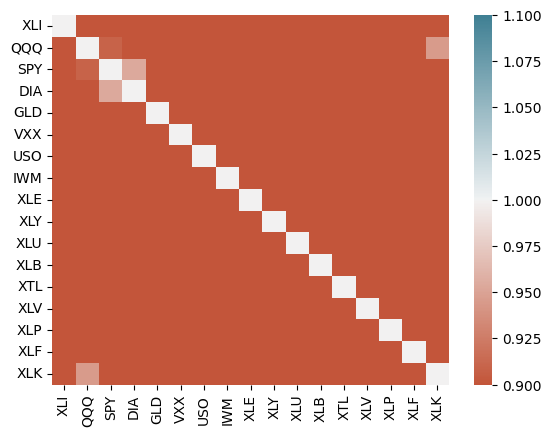

In [ ]:
sns.heatmap(etfs.corr(), vmin=1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True))

In [ ]:
telecomSymbols = sp500_sym[sp500_sym['sector']=='telecommunications_services']['symbol']

In [ ]:
telecomSymbols

332       T
333     CTL
334     FTR
335      VZ
336    LVLT
Name: symbol, dtype: object

In [ ]:
telecom = sp500_px.loc[sp500_px.index>='2012-07-01', telecomSymbols]

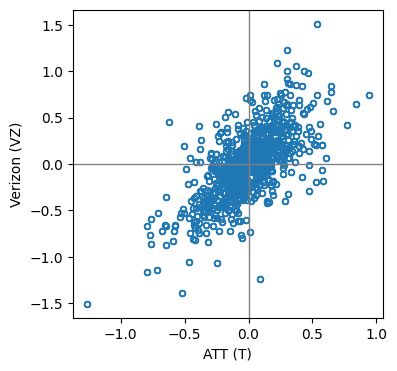

In [ ]:
ax = telecom.plot.scatter(x='T', y='VZ', figsize=(4,4), marker='$\u25EF$')
ax.set_xlabel('ATT (T)')
ax.set_ylabel('Verizon (VZ)')
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1)

In [ ]:
kc_tax = pd.read_csv('./data/kc_tax.csv.gz')

In [ ]:
kc_tax

,TaxAssessedValue,SqFtTotLiving,ZipCode
0,NaN,1730,98117.0
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0
...,...,...,...
498244,375000.0,2230,98056.0
498245,316000.0,1710,98056.0
498246,340000.0,1930,98056.0
498247,132000.0,2930,98056.0


In [ ]:
kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000) & (kc_tax.SqFtTotLiving > 100) & (kc_tax.SqFtTotLiving < 3500), :]
kc_tax0.shape

(432693, 3)

Text(0, 0.5, 'Tax-Assessed Value')

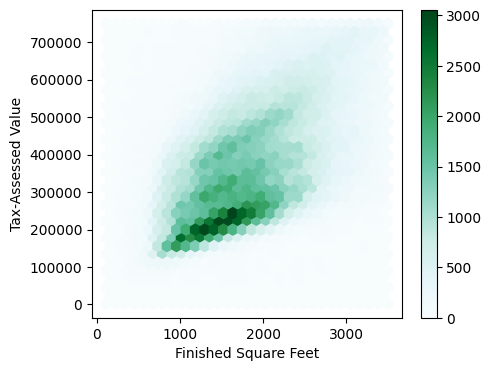

In [ ]:
ax = kc_tax0.plot.hexbin(x='SqFtTotLiving', y='TaxAssessedValue', gridsize=30, sharex=False, figsize=(5, 4))
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax-Assessed Value')

Text(0, 0.5, 'Tax-Assessed Value')

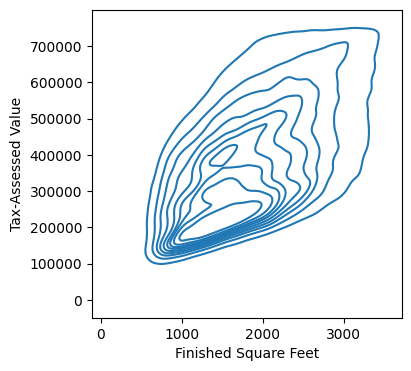

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(4, 4))
ax = sns.kdeplot(data=kc_tax0, x='SqFtTotLiving', y='TaxAssessedValue', ax=ax)
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax-Assessed Value')

In [ ]:
lc_loans = pd.read_csv('./data/lc_loans.csv')
crosstab = lc_loans.pivot_table(index='grade', columns='status', aggfunc=lambda x: len(x), margins=True)
crosstab

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,1562,50051,20408,469,72490
B,5302,93852,31160,2056,132370
C,6023,88928,23147,2777,120875
D,5007,53281,13681,2308,74277
E,2842,24639,5949,1374,34804
F,1526,8444,2328,606,12904
G,409,1990,643,199,3241
All,22671,321185,97316,9789,450961


In [ ]:
df = crosstab.loc['A':'G',:].copy()
df

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,1562,50051,20408,469,72490
B,5302,93852,31160,2056,132370
C,6023,88928,23147,2777,120875
D,5007,53281,13681,2308,74277
E,2842,24639,5949,1374,34804
F,1526,8444,2328,606,12904
G,409,1990,643,199,3241


In [ ]:
df.loc[:, 'Charged Off': 'Late'] = df.loc[:, 'Charged Off': 'Late'].div(df['All'], axis=0)
df['All'] = df['All'] / sum(df['All'])
perc_crosstab = df

<ipython-input-22-4d90b45d40c0>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.0215478  0.04005439 0.04982834 0.06740983 0.08165728 0.1182579
 0.12619562]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, 'Charged Off': 'Late'] = df.loc[:, 'Charged Off': 'Late'].div(df['All'], axis=0)
<ipython-input-22-4d90b45d40c0>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.69045386 0.70901262 0.73570217 0.71732838 0.70793587 0.65437074
 0.61400802]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, 'Charged Off': 'Late'] = df.loc[:, 'Charged Off': 'Late'].div(df['All'], axis=0)
<ipython-input-22-4d90b45d40c0>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.28152849 0.235400

In [ ]:
perc_crosstab

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,0.021548,0.690454,0.281528,0.006470,0.160746
B,0.040054,0.709013,0.235401,0.015532,0.293529
C,0.049828,0.735702,0.191495,0.022974,0.268039
D,0.067410,0.717328,0.184189,0.031073,0.164708
E,0.081657,0.707936,0.170929,0.039478,0.077177
F,0.118258,0.654371,0.180409,0.046962,0.028614
G,0.126196,0.614008,0.198396,0.061401,0.007187


In [ ]:
airline_stats = pd.read_csv('./data/airline_stats.csv')

Text(0.5, 0.98, '')

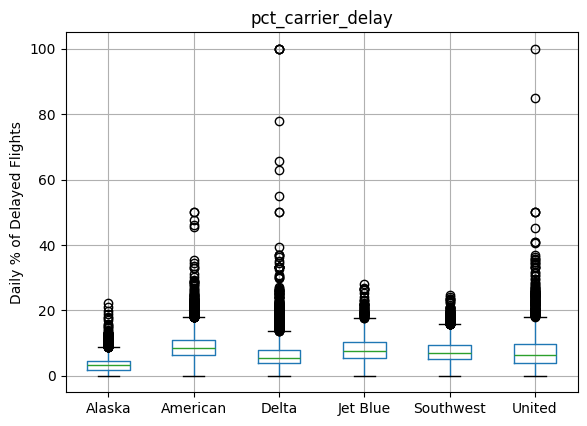

In [ ]:
ax = airline_stats.boxplot(by='airline', column='pct_carrier_delay')
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')
plt.suptitle('')

Text(0, 0.5, 'Daily % of Delayed Flights')

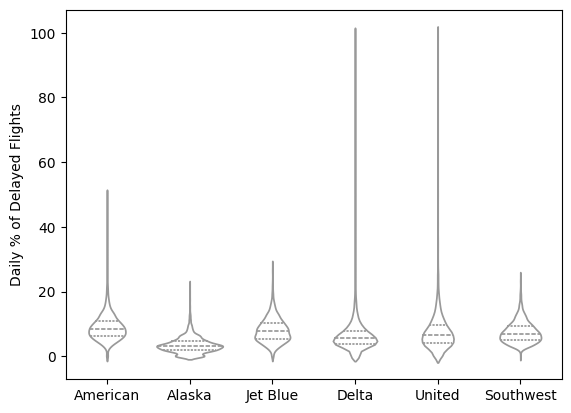

In [ ]:
import seaborn as sns

ax = sns.violinplot(x=airline_stats.airline, y=airline_stats.pct_carrier_delay, inner='quartile', color='white')
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')

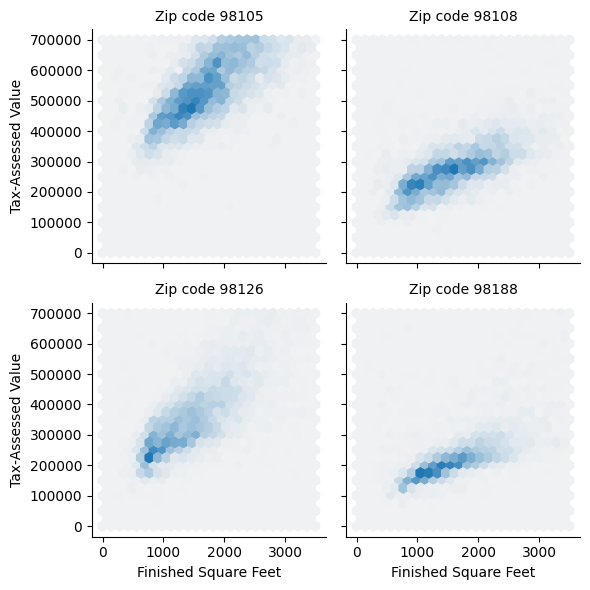

In [ ]:
zip_codes = [98188, 98105, 98108, 98126]
kc_tax_zip = kc_tax0.loc[kc_tax0.ZipCode.isin(zip_codes), :]
kc_tax_zip

def hexbin(x, y, color, **kwargs):
  cmap = sns.light_palette(color, as_cmap=True)
  plt.hexbin(x, y, gridsize=25, cmap=cmap, **kwargs)

g = sns.FacetGrid(kc_tax_zip, col='ZipCode', col_wrap=2)
g.map(hexbin, 'SqFtTotLiving', 'TaxAssessedValue', extent=[0, 3500, 0, 700000])
g.set_axis_labels('Finished Square Feet', 'Tax-Assessed Value')
g.set_titles('Zip code {col_name:.0f}')

# 2. 데이터와 표본분포

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

loans_income = pd.read_csv('./data/loans_income.csv')

In [ ]:
loans_income = pd.Series(loans_income['x'])

In [ ]:
loans_income

0         67000
1         52000
2        100000
3         78762
4         37041
          ...  
49995     40000
49996     54000
49997     50000
49998     82000
49999     70000
Name: x, Length: 50000, dtype: int64

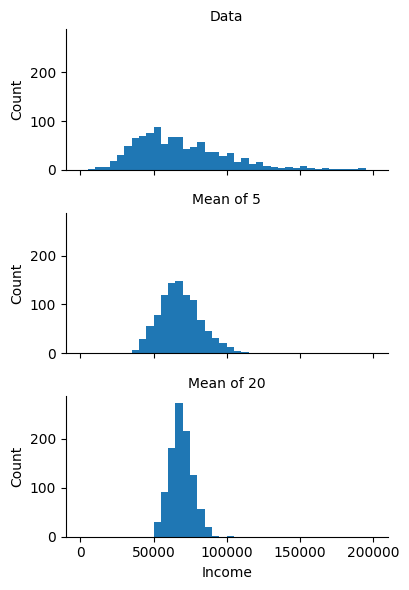

In [ ]:
sample_data = pd.DataFrame({
  'income': loans_income.sample(1000),
  'type': 'Data',
})
sample_mean_05 = pd.DataFrame({
  'income': [loans_income.sample(5).mean() for _ in range(1000)],
  'type': 'Mean of 5'
})
sample_mean_20 = pd.DataFrame({
  'income': [loans_income.sample(20).mean() for _ in range(1000)],
  'type': 'Mean of 20'
})
results = pd.concat([sample_data, sample_mean_05, sample_mean_20])

g = sns.FacetGrid(results, col='type', col_wrap=1, height=2, aspect=2)
g.map(plt.hist, 'income', range=[0, 200000], bins=40)
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')



In [ ]:
from sklearn.utils import resample

results = []
for nrepeat in range(1000):
  sample = resample(loans_income)
  results.append(sample.median())
results = pd.Series(results)
print('Bootstrap Statistics:')
print(f'original: {loans_income.median()}')
print(f'bias: {results.mean() - loans_income.median()}')
print(f'std. error: {results.std()}')

Bootstrap Statistics:
original: 62000.0
bias: -77.76249999999709
std. error: 221.87064458074815


In [ ]:
import pandas as pd
import seaborn as sns

loans_income = pd.read_csv('data/loans_income.csv').squeeze('columns')
sample_data = pd.DataFrame({
    'income': loans_income.sample(1000),
    'type': 'Data'
})

In [ ]:
from sklearn.utils import resample

results = []
for nrepeat in range(1000):
  sample = resample(loans_income)
  results.append(sample.median())
results = pd.Series(results)
print('Bootstrap Statistics:')
print(f'original: {loans_income.median()}')
print(f'bias: {results.mean() - loans_income.median()}')
print(f'std. error: {results.std()}')


Bootstrap Statistics:
original: 62000.0
bias: -73.25400000000081
std. error: 209.83087112834107


((array([-2.46203784, -2.12570747, -1.93122778, -1.79044653, -1.67819304,
         -1.58381122, -1.50174123, -1.42869743, -1.36256869, -1.30191411,
         -1.24570419, -1.19317644, -1.14374949, -1.09696931, -1.05247413,
         -1.00997067, -0.96921765, -0.93001393, -0.89218993, -0.85560121,
         -0.82012357, -0.78564937, -0.75208458, -0.71934648, -0.68736185,
         -0.65606548, -0.62539893, -0.59530962, -0.56574992, -0.53667655,
         -0.50804994, -0.47983378, -0.45199463, -0.42450149, -0.39732558,
         -0.37044003, -0.34381966, -0.31744076, -0.29128096, -0.26531902,
         -0.23953472, -0.21390872, -0.18842244, -0.16305799, -0.13779803,
         -0.1126257 , -0.08752455, -0.06247843, -0.03747145, -0.01248789,
          0.01248789,  0.03747145,  0.06247843,  0.08752455,  0.1126257 ,
          0.13779803,  0.16305799,  0.18842244,  0.21390872,  0.23953472,
          0.26531902,  0.29128096,  0.31744076,  0.34381966,  0.37044003,
          0.39732558,  0.42450149,  0.

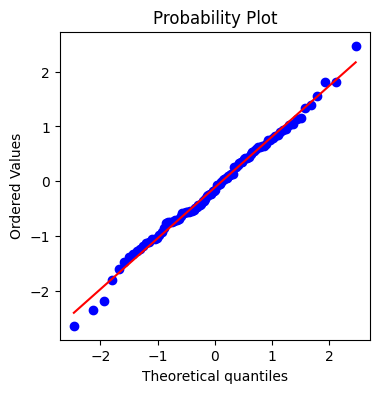

In [ ]:
import matplotlib.pyplot as plt
from scipy import stats

fig, ax = plt.subplots(figsize=(4, 4))
norm_sample = stats.norm.rvs(size=100)
stats.probplot(norm_sample, plot=ax)

In [ ]:
sp500_px = pd.read_csv('data/sp500_data.csv')

In [ ]:
sp500_px

,Unnamed: 0,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
0,1993-01-29,0.000000,0.060124,-0.022100,0.000000,0.000000,0.018897,0.007368,0.092165,0.259140,...,0.000000,0.000000,0.347160,0.000000,0.041670,0.000000,0.015564,1.750000,0.125000,0.000000
1,1993-02-01,0.000000,-0.180389,0.027621,0.000000,0.000000,0.018889,0.018425,0.115207,-0.100775,...,0.000000,0.000000,-0.231440,0.000000,0.000000,-0.010410,0.007782,1.250000,0.125000,0.000000
2,1993-02-02,0.000000,-0.120257,0.035900,0.000000,0.000000,-0.075573,0.029482,-0.023041,0.028796,...,0.000000,0.000000,-0.115720,0.000000,0.000000,0.000000,-0.007792,-0.250000,0.000000,0.000000
3,1993-02-03,0.000000,0.060124,-0.024857,0.000000,0.000000,-0.151128,0.003689,-0.253454,-0.043190,...,0.000000,0.000000,-0.086790,0.000000,0.041670,-0.041670,-0.038919,-0.500000,0.062500,0.000000
4,1993-02-04,0.000000,-0.360770,-0.060757,0.000000,0.000000,0.113350,-0.022114,0.069862,0.000000,...,0.000000,0.000000,0.144650,0.000000,-0.041660,-0.031260,-0.046711,0.000000,0.062500,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5642,2015-06-25,0.019989,-0.529999,-0.379997,0.080002,0.350003,-0.580002,-0.457999,-1.720001,-0.009936,...,-2.500000,1.889999,-2.060012,0.150002,-1.630004,-0.990005,-2.250000,1.270019,-1.919998,-0.080002
5643,2015-06-26,-1.299988,-0.330000,-0.390004,-1.820000,0.190003,0.330002,-0.328565,-0.769989,0.020000,...,-0.070007,-2.380005,-1.390000,0.550004,-3.509979,-1.080002,-0.800003,-1.900024,-3.629997,0.440002
5644,2015-06-29,-10.299988,-0.410000,-0.670002,-1.250000,-1.919998,-0.510002,-0.139999,-0.949997,-0.100000,...,-2.250000,-5.490005,-5.029999,0.090000,-8.290009,-1.209999,-2.419998,-9.620026,-3.770004,-2.479996
5645,2015-06-30,-2.109986,-0.049999,-0.559997,-0.099999,-0.689999,-0.610001,0.239999,-1.330001,-0.200000,...,-0.299988,0.270004,0.279999,-1.710001,0.390014,0.439995,-0.209999,-2.070007,-0.849999,-1.360001


((array([-3.33278964, -3.07756454, -2.93575124, ...,  2.93575124,
          3.07756454,  3.33278964]),
  array([-6.60529819, -6.09667121, -5.40220961, ...,  5.12547859,
          5.87072271,  6.03787   ])),
 (1.4823778663727092, 0.0015561067366313861, 0.9941828221936319))

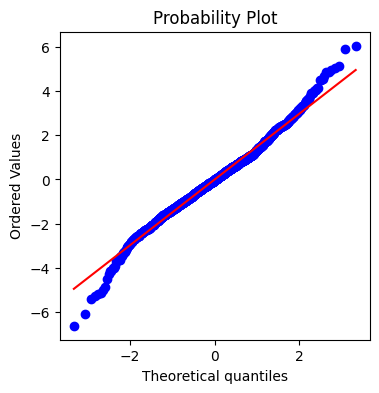

In [ ]:
import numpy as np

nflx = sp500_px.NFLX
nflx = np.diff(np.log(nflx[nflx>0]))
fig, ax = plt.subplots(figsize=(4, 4))
stats.probplot(nflx, plot=ax)

In [ ]:
stats.binom.pmf(2, n=5, p=0.1)

0.07289999999999992

In [ ]:
stats.binom.cdf(2, n=5, p=0.1)

0.99144

In [ ]:
stats.poisson.rvs(2, size=100)

array([1, 1, 3, 2, 2, 3, 3, 1, 1, 1, 4, 2, 1, 2, 1, 2, 2, 0, 1, 4, 2, 8,
       1, 1, 0, 2, 1, 1, 0, 3, 0, 3, 5, 1, 0, 2, 1, 3, 1, 1, 4, 2, 1, 1,
       1, 0, 2, 1, 0, 5, 1, 0, 1, 2, 1, 6, 5, 2, 2, 1, 2, 0, 3, 3, 4, 4,
       0, 2, 2, 1, 2, 3, 0, 0, 2, 2, 2, 2, 0, 3, 0, 6, 1, 1, 0, 2, 5, 1,
       2, 4, 1, 1, 1, 1, 2, 2, 2, 1, 3, 0], dtype=int64)

In [ ]:
stats.expon.rvs(scale=1/0.2, size=100)

array([2.10902277e+00, 2.83831136e+00, 1.21248417e+01, 1.22017958e+00,
       2.73991505e+00, 2.39821630e+00, 1.09280087e+01, 5.32793384e-01,
       1.10435519e+01, 3.11125784e-02, 3.65681592e+00, 2.08377323e+00,
       4.33151762e+00, 8.47813885e-01, 5.32739312e+00, 1.76717217e+00,
       6.78146461e+00, 8.64089109e-01, 1.48453793e+01, 4.25618267e+00,
       2.07511272e+00, 1.26448905e+00, 5.84849036e+00, 4.55602608e+00,
       1.51177281e+00, 2.73921502e+00, 1.52223567e-01, 3.85630844e+00,
       2.62855839e-01, 7.64266460e+00, 3.59303815e-01, 2.31166340e+00,
       3.72370844e-01, 6.00936346e+00, 1.91342029e+00, 4.80276044e+00,
       9.53221680e+00, 1.53629332e-02, 2.46867831e+01, 5.94758199e+00,
       1.95935244e+00, 1.10535146e+01, 6.30659520e+00, 7.68158761e-01,
       1.10113526e+01, 6.05594247e+00, 1.08267050e+01, 5.08798588e+00,
       4.55865230e+00, 7.07285916e+00, 4.26614848e+00, 5.96268352e+00,
       3.93060242e+00, 1.72609481e-01, 3.23346428e+00, 1.96913575e+00,
      

In [ ]:
stats.expon.rvs(scale=5, size=100)

array([5.55738023e-01, 1.55216788e+01, 1.91853192e+00, 3.70612162e-01,
       4.22743106e+00, 2.32054489e+01, 1.28311666e+01, 8.34881294e-01,
       2.06629477e+00, 7.37689923e-01, 1.11515403e+00, 2.46208642e+00,
       8.31080742e-01, 1.40485508e+00, 2.97087636e+00, 3.05277269e+00,
       3.71358354e+00, 1.84107720e+00, 4.35223258e+00, 3.68060421e+00,
       6.26377285e+00, 3.69855766e+00, 4.06451745e-01, 1.47846637e-01,
       3.22860069e+00, 5.81122656e-01, 7.21372946e+00, 4.47209270e+00,
       4.06703417e+00, 4.34019014e+00, 4.03457156e+00, 3.52293489e+00,
       7.64937593e+00, 4.38096879e+00, 6.43997658e-01, 2.28773537e-01,
       4.43861443e+00, 6.43456086e+00, 3.41519517e+00, 7.68013564e+00,
       2.11547953e+00, 7.43367154e-02, 1.60208343e+00, 1.94284091e+01,
       4.00593594e-01, 1.30342980e+00, 3.46178280e-02, 4.64044774e+00,
       9.35639875e-01, 3.51905601e+00, 1.07578510e+01, 6.02780026e+00,
       9.33723318e-01, 7.17783838e+00, 6.12541906e-03, 7.77799563e+00,
      

In [ ]:
stats.weibull_min.rvs(1.5, scale=5000, size=100)

array([ 3840.28535014,  5276.59324277,  4225.51952291,  5556.46384005,
        2621.82284698,  4706.10932291,  3217.02025308,  5870.96891423,
        9203.04361803,  8667.7197152 ,  1523.60448433,  3657.01956942,
        7787.71067936,  8331.09674884,  1870.95863693,  3225.66049964,
        2090.48158994,   880.86652296,  5646.5593811 ,  1357.75010951,
        8337.16730611,  3474.44596008,  3022.27479377,  1178.84417322,
        2745.30745193,  8467.94854673,  9859.13366654,  2197.01559016,
        2790.15910908,  3767.31913065,   875.10918492,  4688.29728084,
        8695.35558203,  6303.26887108,   428.17830004,  2423.1248191 ,
       12435.71394363,  1303.10486013,  4674.18047066,  4238.3780018 ,
        6828.17846979,  6129.72424236,  2922.6340585 , 10548.46645707,
         731.88592427,  8065.51483384,  2833.08866887, 13171.94400364,
        4446.17829435,  2057.02262234,   777.50109765,   747.48986902,
        9519.57628403,  1669.22231307,  4107.74254276,  2248.99880011,
      

# 3. 통계적 실험과 유의성검정

In [ ]:
import pandas as pd

session_times = pd.read_csv('./data/web_page_data.csv')

In [ ]:
session_times['Time'] = session_times['Time'] * 100

Text(0.5, 0.98, '')

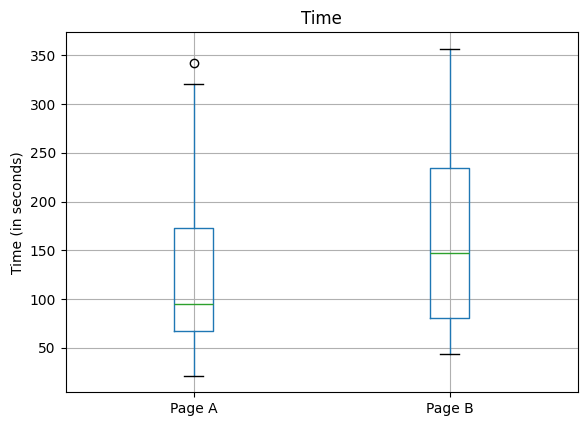

In [ ]:
import matplotlib.pyplot as plt

ax = session_times.boxplot(by='Page', column='Time')
ax.set_xlabel('')
ax.set_ylabel('Time (in seconds)')
plt.suptitle('')

In [ ]:
mean_a = session_times[session_times.Page == 'Page A'].Time.mean()
mean_b = session_times[session_times.Page == 'Page B'].Time.mean()
mean_b - mean_a

35.66666666666667

In [ ]:
import random

def perm_fun(x, nA, nB):
  n = nA + nB
  idx_B = set(random.sample(range(n), nB))
  idx_A = set(range(n)) - idx_B
  return x.loc[list(idx_B)].mean() - x.loc[list(idx_A)].mean()

Text(0, 0.5, 'Frequency')

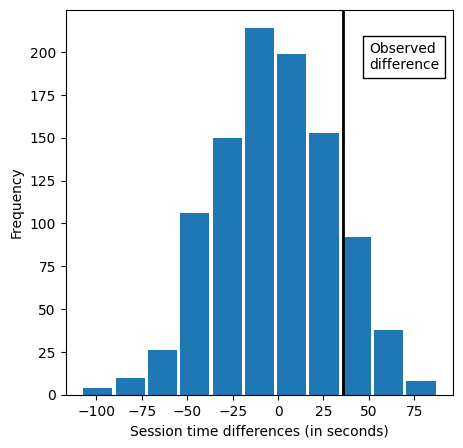

In [ ]:
perm_diffs = [perm_fun(session_times.Time, 21, 15) for _ in range(1000)]

fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(perm_diffs, bins=11, rwidth=0.9)
ax.axvline(x = mean_b - mean_a, color='black', lw=2)
ax.text(50, 190, 'Observed\ndifference', bbox={'facecolor': 'white'})
ax.set_xlabel('Session time differences (in seconds)')
ax.set_ylabel('Frequency')

In [ ]:
import numpy as np

np.mean(perm_diffs > mean_b - mean_a)

0.126

Observed difference: 0.0368


Text(0, 0.5, 'Frequency')

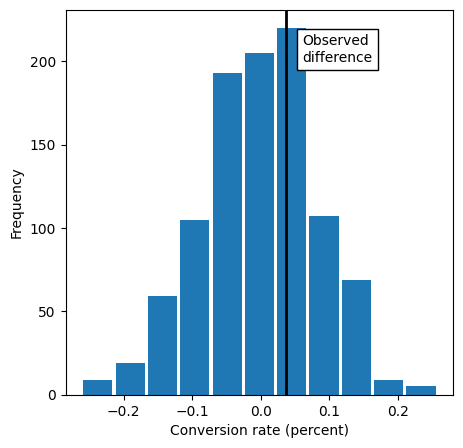

In [ ]:
obs_pct_diff = 100 * (200 / 23739 - 182 / 22588)
print(f'Observed difference: {obs_pct_diff:.4f}')
conversion = [0] * 45945
conversion.extend([1] * 382)
conversion = pd.Series(conversion)

perm_diffs = [100 * perm_fun(conversion, 23739, 22588) for _ in range(1000)]

fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(perm_diffs, bins=11, rwidth=0.9)
ax.axvline(x=obs_pct_diff, color='black', lw=2)
ax.text(0.06, 200, 'Observed\ndifference', bbox={'facecolor': 'white'})
ax.set_xlabel('Conversion rate (percent)')
ax.set_ylabel('Frequency')

In [ ]:
np.mean([diff > obs_pct_diff for diff in perm_diffs])

0.32

In [ ]:
from scipy import stats

survivors = np.array([[200, 23739-200], [182, 22588-182]])
chi2, p_value, df, _ = stats.chi2_contingency(survivors)

print(f'p-value for single sided test: {p_value / 2: .4f}')

p-value for single sided test:  0.3498


In [ ]:
from scipy import stats

res = stats.ttest_ind(session_times[session_times.Page == 'Page A'].Time, session_times[session_times.Page == 'Page B'].Time, equal_var=False)

print(f'p-value for single sided test: {res.pvalue / 2:.4f}')

p-value for single sided test: 0.1408


In [ ]:
four_sessions = pd.read_csv('data/four_sessions.csv')
four_sessions

,Page,Time
0,Page 1,164
1,Page 2,178
2,Page 3,175
3,Page 4,155
4,Page 1,172
5,Page 2,191
6,Page 3,193
7,Page 4,166
8,Page 1,177
9,Page 2,182


In [ ]:
observed_variance = four_sessions.groupby('Page').mean().var()

In [ ]:
observed_variance

Time    55.426667
dtype: float64

In [ ]:
observed_variance = observed_variance[0]
observed_variance

<ipython-input-7-605c60406b1a>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  observed_variance = observed_variance[0]


55.426666666666655

In [ ]:
import numpy as np

print('Observed means:', four_sessions.groupby('Page').mean().values.ravel())
print('Variance:', observed_variance)

def perm_test(df):
  df = df.copy()
  df['Time'] = np.random.permutation(df['Time'].values)
  return df.groupby('Page').mean().var()[0]

perm_variance = [perm_test(four_sessions) for _ in range(3000)]
print('Pr(Prob)', np.mean([var > observed_variance for var in perm_variance]))

Observed means: [172.8 182.6 175.6 164.6]
Variance: 55.426666666666655


<ipython-input-9-1ef35fcfa484>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return df.groupby('Page').mean().var()[0]
<ipython-input-9-1ef35fcfa484>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return df.groupby('Page').mean().var()[0]
<ipython-input-9-1ef35fcfa484>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return df.groupby('Page').mean().var()[0]
<ipython-input-9-1ef35fcfa484>:9: FutureWarning: Series.__getitem__ tr

Pr(Prob) 0.072


In [ ]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

model = smf.ols('Time ~ Page', data=four_sessions).fit()

aov_table = sm.stats.anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
Page,3.0,831.4,277.133333,2.739825,0.077586
Residual,16.0,1618.4,101.150000,NaN,NaN


In [ ]:
click_rate = pd.read_csv('data/click_rates.csv')
clicks = click_rate.pivot(index='Click', columns='Headline', values='Rate')

In [ ]:
clicks

Headline,Headline A,Headline B,Headline C
Click,,,
Click,14,8,12
No-click,986,992,988


In [ ]:
import random

box = [1] * 34
box.extend([0] * 2966)
random.shuffle(box)

def chi2(observed, expected):
  pearson_residuals = []
  for row, expect in zip(observed, expected):
    pearson_residuals.append([(observe-expect) ** 2 / expect for observe in row])
  return np.sum(pearson_residuals)
  
expected_clicks = 34 / 3
expected_noclicks = 1000 - expected_clicks
expected = [34 / 3, 1000-34 / 3]
chi2observed = chi2(clicks.values, expected)

def perm_fun(box):
  sample_clicks = [sum(random.sample(box, 1000)),
                   sum(random.sample(box, 1000)),
                   sum(random.sample(box, 1000))]
  sample_noclicks = [1000 - n for n in sample_clicks]
  return chi2([sample_clicks, sample_noclicks], expected)

perm_chi2 = [perm_fun(box) for _ in range(2000)]

resampled_p_value = sum(perm_chi2 > chi2observed) / len(perm_chi2)
print(f'Observed chi2: {chi2observed:.4f}')
print(f'Resampled p-value: {resampled_p_value:.4f}')

Observed chi2: 1.6659
Resampled p-value: 0.4920


In [ ]:
from scipy import stats

chisq, pvalue, df, expected = stats.chi2_contingency(clicks)
print(f'Observed chi2: {chi2observed:.4f}')
print(f'p-value: {pvalue:.4f}')

Observed chi2: 1.6659
p-value: 0.4348


In [ ]:
effect_size = sm.stats.proportion_effectsize(0.0121, 0.011)
analysis = sm.stats.TTestIndPower()
result = analysis.solve_power(effect_size=effect_size, alpha=0.05, power=0.8, alternative='larger')
print('Sample Size: %.3f' % result)

Sample Size: 116602.391


In [ ]:
effect_size = sm.stats.proportion_effectsize(0.0165, 0.011)
analysis = sm.stats.TTestIndPower()
result = analysis.solve_power(effect_size=effect_size, alpha=0.05, power=0.8, alternative='larger')
print('Sample Size: %.3f' % result)

Sample Size: 5488.408


# 4. 회귀

In [ ]:
import pandas as pd

lung = pd.read_csv('data/LungDisease.csv')

In [ ]:
from sklearn.linear_model import LinearRegression

predictors = ['Exposure']
outcome = 'PEFR'

model = LinearRegression()
model.fit(lung[predictors], lung[outcome])

print(f'Intercept: {model.intercept_:.3f}')
print(f'Coefficient Exposure: {model.coef_[0]:.3f}')

Intercept: 424.583
Coefficient Exposure: -4.185


In [ ]:
fitted = model.predict(lung[predictors])
residuals = lung[outcome] - fitted

In [ ]:
fitted

array([424.58280657, 424.58280657, 424.58280657, 424.58280657,
       420.39823009, 416.2136536 , 416.2136536 , 416.2136536 ,
       412.02907712, 412.02907712, 412.02907712, 412.02907712,
       412.02907712, 412.02907712, 407.84450063, 407.84450063,
       407.84450063, 407.84450063, 407.84450063, 407.84450063,
       403.65992415, 399.47534766, 399.47534766, 399.47534766,
       399.47534766, 399.47534766, 395.29077118, 395.29077118,
       395.29077118, 395.29077118, 395.29077118, 395.29077118,
       395.29077118, 391.10619469, 386.9216182 , 382.73704172,
       382.73704172, 382.73704172, 374.36788875, 374.36788875,
       370.18331226, 370.18331226, 370.18331226, 370.18331226,
       370.18331226, 370.18331226, 370.18331226, 370.18331226,
       365.99873578, 365.99873578, 365.99873578, 365.99873578,
       365.99873578, 365.99873578, 361.81415929, 361.81415929,
       361.81415929, 357.62958281, 357.62958281, 353.44500632,
       353.44500632, 353.44500632, 353.44500632, 353.44

In [ ]:
residuals

0      -34.582807
1      -14.582807
2        5.417193
3       35.417193
4       -0.398230
          ...    
117    117.477876
118    157.477876
119    167.477876
120     41.662453
121     61.662453
Name: PEFR, Length: 122, dtype: float64

In [ ]:
import pandas as pd
house = pd.read_csv('data/house_sales.csv', sep='\t')

In [ ]:
house

,DocumentDate,SalePrice,PropertyID,PropertyType,ym,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,SqFtLot,...,Bathrooms,Bedrooms,BldgGrade,YrBuilt,YrRenovated,TrafficNoise,LandVal,ImpsVal,ZipCode,NewConstruction
1,2014-09-16,280000,1000102,Multiplex,2014-09-01,405100,0.930836,300805.0,2,9373,...,3.00,6,7,1991,0,0,70000,229000,98002,False
2,2006-06-16,1000000,1200013,Single Family,2006-06-01,404400,0.929228,1076162.0,1,20156,...,3.75,4,10,2005,0,0,203000,590000,98166,True
3,2007-01-29,745000,1200019,Single Family,2007-01-01,425600,0.977941,761805.0,1,26036,...,1.75,4,8,1947,0,0,183000,275000,98166,False
4,2008-02-25,425000,2800016,Single Family,2008-02-01,418400,0.961397,442065.0,1,8618,...,3.75,5,7,1966,0,0,104000,229000,98168,False
5,2013-03-29,240000,2800024,Single Family,2013-03-01,351600,0.807904,297065.0,1,8620,...,1.75,4,7,1948,0,0,104000,205000,98168,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27057,2011-04-08,325000,9842300710,Single Family,2011-04-01,318700,0.732307,443803.0,1,5468,...,1.75,3,7,1951,0,0,201000,172000,98126,False
27058,2007-09-28,1580000,9845500010,Single Family,2007-09-01,433500,0.996094,1586196.0,1,23914,...,4.50,4,11,2000,0,1,703000,951000,98040,False
27061,2012-07-09,165000,9899200010,Single Family,2012-07-01,325300,0.747472,220744.0,1,11170,...,1.00,4,6,1971,0,0,92000,130000,98055,False
27062,2006-05-26,315000,9900000355,Single Family,2006-05-01,400600,0.920496,342207.0,1,6223,...,2.00,3,7,1939,0,0,103000,212000,98166,False


In [ ]:
subset = ['AdjSalePrice', 'SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade']
house[subset].head()

,AdjSalePrice,SqFtTotLiving,SqFtLot,Bathrooms,Bedrooms,BldgGrade
1,300805.0,2400,9373,3.00,6,7
2,1076162.0,3764,20156,3.75,4,10
3,761805.0,2060,26036,1.75,4,8
4,442065.0,3200,8618,3.75,5,7
5,297065.0,1720,8620,1.75,4,7


In [ ]:
from sklearn.linear_model import LinearRegression

predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'

house_lm = LinearRegression()
house_lm.fit(house[predictors], house[outcome])

LinearRegression()

In [ ]:
print(f'Intercept: {house_lm.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(predictors, house_lm.coef_):
  print(f' {name}: {coef}')

Intercept: -521871.368
Coefficients:
 SqFtTotLiving: 228.83060360240754
 SqFtLot: -0.06046682065306008
 Bathrooms: -19442.840398321146
 Bedrooms: -47769.955185214094
 BldgGrade: 106106.9630789811


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

fitted = house_lm.predict(house[predictors])
RMSE = np.sqrt(mean_squared_error(house[outcome], fitted))
r2 = r2_score(house[outcome], fitted)
print(f'RMSE: {RMSE:.0f}')
print(f'r2: {r2:.4f}')

RMSE: 261220
r2: 0.5406


In [ ]:
import statsmodels.api as sm

model = sm.OLS(house[outcome], house[predictors].assign(const=1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdjSalePrice   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     5338.
Date:                Tue, 06 May 2025   Prob (F-statistic):               0.00
Time:                        13:24:07   Log-Likelihood:            -3.1517e+05
No. Observations:               22687   AIC:                         6.304e+05
Df Residuals:                   22681   BIC:                         6.304e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
SqFtTotLiving   228.8306      3.899     58.694      0.000     221.189     236.472
SqFtLot          -0.0605      0.061     -0.988      0.323      -0.180       0.059
Bathrooms     -1.944e+04   3625.388     -5.363      0.000   -2.65e+04   -1.23e+04
Bedrooms      -4.777e+04   2489.732    -19.187      0.000   -5.27e+04   -4.29e+04
BldgGrade      1.061e+05   2396.445     44.277      0.000    1.01e+05    1.11e+05
const         -5.219e+05   1.57e+04    -33.342      0.000   -5.53e+05   -4.91e+05
==============================================================================
Omnibus:                    29676.557   Durbin-Watson:                   1.247
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         19390738.346
Skew:                           6.889   Prob(JB):                         0.00
Kurtosis:                     145.559   Cond. No.                     2.86e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.86e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade', 'PropertyType', 'NbrLivingUnits', 'SqFtFinBasement', 'YrBuilt', 'YrRenovated', 'NewConstruction']

X = pd.get_dummies(house[predictors], drop_first=True, dtype=int)
X['NewConstruction'] = [1 if nc else 0 for nc in X['NewConstruction']]

house_full = sm.OLS(house[outcome], X.assign(const=1))
results = house_full.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdjSalePrice   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     2771.
Date:                Tue, 06 May 2025   Prob (F-statistic):               0.00
Time:                        13:34:42   Log-Likelihood:            -3.1375e+05
No. Observations:               22687   AIC:                         6.275e+05
Df Residuals:                   22674   BIC:                         6.276e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
SqFtTotLiving                198.6364      4.234     46.920      0.000     190.338     206.934
SqFtLot                        0.0771      0.058      1.330      0.184      -0.037       0.191
Bathrooms                   4.286e+04   3808.114     11.255      0.000    3.54e+04    5.03e+04
Bedrooms                   -5.187e+04   2396.904    -21.638      0.000   -5.66e+04   -4.72e+04
BldgGrade                   1.373e+05   2441.242     56.228      0.000    1.32e+05    1.42e+05
NbrLivingUnits              5723.8438   1.76e+04      0.326      0.744   -2.87e+04    4.01e+04
SqFtFinBasement                7.0611      4.627      1.526      0.127      -2.009      16.131
YrBuilt                    -3574.2210     77.228    -46.282      0.000   -3725.593   -3422.849
YrRenovated                   -2.5311      3.924     -0.645      0.519     -10.222       5.160
NewConstruction            -2489.1122   5936.692     -0.419      0.675   -1.41e+04    9147.211
PropertyType_Single Family  2.997e+04   2.61e+04      1.149      0.251   -2.12e+04    8.11e+04
PropertyType_Townhouse      9.286e+04    2.7e+04      3.438      0.001    3.99e+04    1.46e+05
const                       6.182e+06   1.55e+05     39.902      0.000    5.88e+06    6.49e+06
==============================================================================
Omnibus:                    31006.128   Durbin-Watson:                   1.393
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         26251977.078
Skew:                           7.427   Prob(JB):                         0.00
Kurtosis:                     168.984   Cond. No.                     2.98e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.98e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
from dmba import stepwise_selection, AIC_score

y = house[outcome]

def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(X[variables], y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(y, [y.mean()] * len(y), model, df=1)
    return AIC_score(y, model.predict(X[variables]), model)

In [ ]:
best_model, best_variables = stepwise_selection(X.columns, train_model, score_model, verbose=True)

print(f'Intercept: {best_model.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(best_variables, best_model.coef_):
    print(f' {name}: {coef}')

Variables: SqFtTotLiving, SqFtLot, Bathrooms, Bedrooms, BldgGrade, NbrLivingUnits, SqFtFinBasement, YrBuilt, YrRenovated, NewConstruction, PropertyType_Single Family, PropertyType_Townhouse
Start: score=647988.32, constant
Step: score=633013.35, add SqFtTotLiving
Step: score=630793.74, add BldgGrade
Step: score=628230.29, add YrBuilt
Step: score=627784.16, add Bedrooms
Step: score=627602.21, add Bathrooms
Step: score=627525.65, add PropertyType_Townhouse
Step: score=627525.08, add SqFtFinBasement
Step: score=627524.98, add PropertyType_Single Family
Step: score=627524.98, unchanged None
Intercept: 6178645.017
Coefficients:
 SqFtTotLiving: 199.2775530420158
 BldgGrade: 137159.5602261976
 YrBuilt: -3565.424939249463
 Bedrooms: -51947.38367361413
 Bathrooms: 42396.16452772056
 PropertyType_Townhouse: 84479.16203299937
 SqFtFinBasement: 7.046974967583083
 PropertyType_Single Family: 22912.05518701767


In [ ]:
house['Year'] = [int(date.split('-')[0]) for date in house.DocumentDate]
house['Weight'] = house.Year - 2005

In [ ]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'

house_wt = LinearRegression()
house_wt.fit(house[predictors], house[outcome], sample_weight=house.Weight)

LinearRegression()

In [ ]:
house.PropertyType.head()

1        Multiplex
2    Single Family
3    Single Family
4    Single Family
5    Single Family
Name: PropertyType, dtype: object

In [ ]:
house['PropertyType']

1            Multiplex
2        Single Family
3        Single Family
4        Single Family
5        Single Family
             ...      
27057    Single Family
27058    Single Family
27061    Single Family
27062    Single Family
27063    Single Family
Name: PropertyType, Length: 22687, dtype: object

In [ ]:
pd.get_dummies(house['PropertyType'], drop_first=True).head()

,Single Family,Townhouse
1,False,False
2,True,False
3,True,False
4,True,False
5,True,False


In [ ]:
pd.get_dummies(house['PropertyType']).head()

,Multiplex,Single Family,Townhouse
1,True,False,False
2,False,True,False
3,False,True,False
4,False,True,False
5,False,True,False


In [ ]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade', 'PropertyType']

X = pd.get_dummies(house[predictors], drop_first=True)

house_lm_factor = LinearRegression()
house_lm_factor.fit(X, house[outcome])

print(f'Intercept: {house_lm_factor.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(X.columns, house_lm_factor.coef_):
  print(f' {name}: {coef}')

Intercept: -446841.366
Coefficients:
 SqFtTotLiving: 223.37362892503805
 SqFtLot: -0.07036798136812195
 Bathrooms: -15979.013473415263
 Bedrooms: -50889.73218483014
 BldgGrade: 109416.30516146208
 PropertyType_Single Family: -84678.21629549275
 PropertyType_Townhouse: -115121.97921609186


In [ ]:
pd.DataFrame(house['ZipCode'].value_counts()).transpose()

ZipCode,98038,98103,98042,98115,98117,98052,98034,98033,98059,98074,...,98051,98024,98354,98050,98057,98288,98224,98068,98113,98043
count,788,671,641,620,619,614,575,517,513,502,...,32,31,9,7,4,4,3,1,1,1


In [ ]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 
              'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'

house_lm = LinearRegression()
house_lm.fit(house[predictors], house[outcome])

LinearRegression()

In [ ]:
zip_groups = pd.DataFrame([
  *pd.DataFrame({
    'ZipCode' : house['ZipCode'],
    'residual': house[outcome] - house_lm.predict(house[predictors]),
  })
  .groupby(['ZipCode'])
  .apply(lambda x: {
    'ZipCode': x.iloc[0,0],
    'count': len(x),
    'median_residual': x.residual.median()
  })
]).sort_values('median_residual')
zip_groups['cum_count'] = np.cumsum(zip_groups['count'])
zip_groups['ZipGroup'] = pd.qcut(zip_groups['cum_count'], 5, labels=False, retbins=False)

to_join = zip_groups[['ZipCode', 'ZipGroup']].set_index('ZipCode')
house = house.join(to_join, on='ZipCode')
house['ZipGroup'] = house['ZipGroup'].astype('category')

<ipython-input-36-5d6a7366f2d7>:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: {


In [ ]:
print(f'Intercept: {best_model.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(best_variables, best_model.coef_):
  print(f' {name}: {coef}')

Intercept: 6178645.017
Coefficients:
 SqFtTotLiving: 199.2775530420158
 BldgGrade: 137159.5602261976
 YrBuilt: -3565.424939249463
 Bedrooms: -51947.38367361413
 Bathrooms: 42396.16452772056
 PropertyType_Townhouse: 84479.16203299937
 SqFtFinBasement: 7.046974967583083
 PropertyType_Single Family: 22912.05518701767


In [ ]:
predictors = ['Bedrooms', 'BldgGrade', 'PropertyType', 'YrBuilt']
outcome = 'AdjSalePrice'

X = pd.get_dummies(house[predictors], drop_first=True)

reduced_lm = LinearRegression()
reduced_lm.fit(X, house[outcome])

LinearRegression()

In [ ]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade', 'PropertyType', 'ZipGroup']
outcome = 'AdjSalePrice'
X = pd.get_dummies(house[predictors], drop_first=True)

confounding_lm = LinearRegression()
confounding_lm.fit(X, house[outcome])

print(f'Intercept: {confounding_lm.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(X.columns, confounding_lm.coef_):
  print(f' {name}: {coef}')

Intercept: -666637.469
Coefficients:
 SqFtTotLiving: 210.61266005580134
 SqFtLot: 0.45498713854659023
 Bathrooms: 5928.425640001405
 Bedrooms: -41682.871840744636
 BldgGrade: 98541.18352726007
 PropertyType_Single Family: 19323.625287919374
 PropertyType_Townhouse: -78198.72092762377
 ZipGroup_1: 53317.17330659819
 ZipGroup_2: 116251.58883563553
 ZipGroup_3: 178360.5317879338
 ZipGroup_4: 338408.60185652046


In [ ]:
import statsmodels.formula.api as smf

model = smf.ols(formula = 'AdjSalePrice ~ SqFtTotLiving*ZipGroup + SqFtLot + ' + 'Bathrooms + Bedrooms + BldgGrade + PropertyType', data=house)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdjSalePrice   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     3247.
Date:                Tue, 06 May 2025   Prob (F-statistic):               0.00
Time:                        17:26:11   Log-Likelihood:            -3.1098e+05
No. Observations:               22687   AIC:                         6.220e+05
Df Residuals:                   22671   BIC:                         6.221e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                     -4.853e+05   2.05e+04    -23.701      0.000   -5.25e+05   -4.45e+05
ZipGroup[T.1]                 -1.113e+04   1.34e+04     -0.830      0.407   -3.74e+04    1.52e+04
ZipGroup[T.2]                  2.032e+04   1.18e+04      1.717      0.086   -2877.441    4.35e+04
ZipGroup[T.3]                   2.05e+04   1.21e+04      1.697      0.090   -3180.870    4.42e+04
ZipGroup[T.4]                 -1.499e+05   1.13e+04    -13.285      0.000   -1.72e+05   -1.28e+05
PropertyType[T.Single Family]  1.357e+04   1.39e+04      0.975      0.330   -1.37e+04    4.09e+04
PropertyType[T.Townhouse]     -5.884e+04   1.51e+04     -3.888      0.000   -8.85e+04   -2.92e+04
SqFtTotLiving                   114.7650      4.863     23.600      0.000     105.233     124.297
SqFtTotLiving:ZipGroup[T.1]      32.6043      5.712      5.708      0.000      21.409      43.799
SqFtTotLiving:ZipGroup[T.2]      41.7822      5.187      8.056      0.000      31.616      51.948
SqFtTotLiving:ZipGroup[T.3]      69.3415      5.619     12.341      0.000      58.329      80.354
SqFtTotLiving:ZipGroup[T.4]     226.6836      4.820     47.032      0.000     217.237     236.131
SqFtLot                           0.6869      0.052     13.296      0.000       0.586       0.788
Bathrooms                     -3619.4533   3202.296     -1.130      0.258   -9896.174    2657.267
Bedrooms                       -4.18e+04   2120.279    -19.715      0.000    -4.6e+04   -3.76e+04
BldgGrade                      1.047e+05   2069.472     50.592      0.000    1.01e+05    1.09e+05
==============================================================================
Omnibus:                    30927.394   Durbin-Watson:                   1.581
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         34361794.502
Skew:                           7.279   Prob(JB):                         0.00
Kurtosis:                     193.101   Cond. No.                     5.80e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.8e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
house_98105 = house.loc[house['ZipCode'] == 98105, ]

predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'

house_outlier = sm.OLS(house_98105[outcome], house_98105[predictors].assign(const=1))
result_98105 = house_outlier.fit()

In [ ]:
from statsmodels.stats.outliers_influence import OLSInfluence

influence = OLSInfluence(result_98105)
sresiduals = influence.resid_studentized_internal
sresiduals.idxmin(), sresiduals.min()

(24333, -4.326731804078558)

In [ ]:
outlier = house_98105.loc[sresiduals.idxmin(), :]
print('AdjSalePrice', outlier[outcome])
print(outlier[predictors])

AdjSalePrice 119748.0
SqFtTotLiving    2900
SqFtLot          7276
Bathrooms         3.0
Bedrooms            6
BldgGrade           7
Name: 24333, dtype: object


Text(0, 0.5, 'studentized residuals')

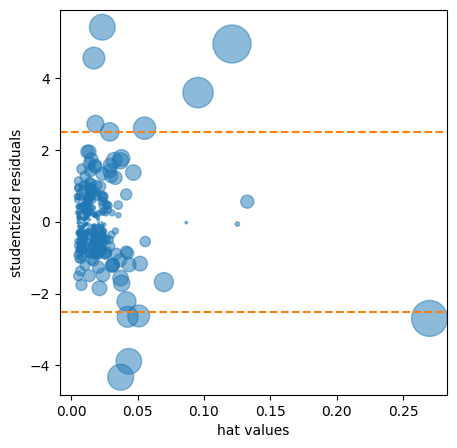

In [ ]:
import matplotlib.pyplot as plt

influence = OLSInfluence(result_98105)
fig, ax = plt.subplots(figsize=(5, 5))
ax.axhline(-2.5, linestyle='--', color='C1')
ax.axhline(2.5, linestyle='--', color='C1')
ax.scatter(influence.hat_matrix_diag, influence.resid_studentized_internal, s=1000 * np.sqrt(influence.cooks_distance[0]), alpha=0.5)
ax.set_xlabel('hat values')
ax.set_ylabel('studentized residuals')

Text(0, 0.5, 'abs(residual)')

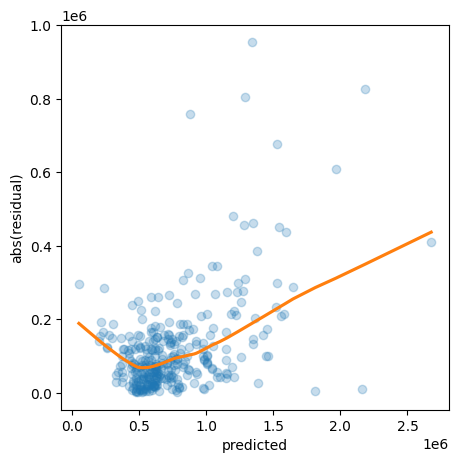

In [ ]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(5, 5))
sns.regplot(x = result_98105.fittedvalues, y=np.abs(result_98105.resid), scatter_kws={'alpha': 0.25}, line_kws={'color': 'C1'}, lowess=True, ax=ax)
ax.set_xlabel('predicted')
ax.set_ylabel('abs(residual)')

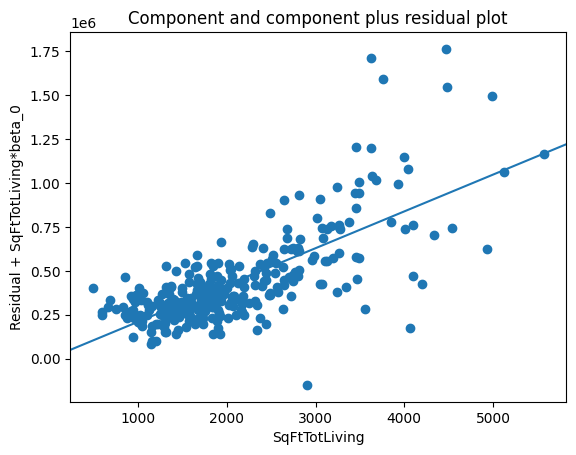

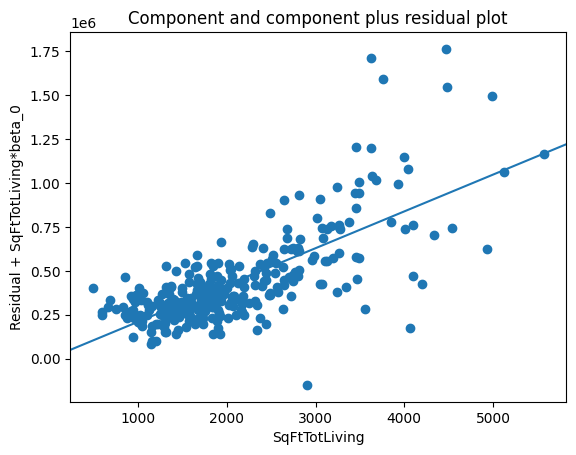

In [ ]:
sm.graphics.plot_ccpr(result_98105, 'SqFtTotLiving')

In [ ]:
model_poly = smf.ols(formula='AdjSalePrice ~ SqFtTotLiving + ' + '+ I(SqFtTotLiving**2) + ' + 'SqFtLot + Bathrooms + Bedrooms + BldgGrade', data=house_98105)
result_poly = model_poly.fit()
result_poly.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdjSalePrice   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     211.6
Date:                Tue, 06 May 2025   Prob (F-statistic):          9.95e-106
Time:                        18:53:14   Log-Likelihood:                -4217.9
No. Observations:                 313   AIC:                             8450.
Df Residuals:                     306   BIC:                             8476.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -6.159e+05   1.03e+05     -5.953      0.000   -8.19e+05   -4.12e+05
SqFtTotLiving             7.4521     55.418      0.134      0.893    -101.597     116.501
I(SqFtTotLiving ** 2)     0.0388      0.010      4.040      0.000       0.020       0.058
SqFtLot                  32.5594      5.436      5.990      0.000      21.863      43.256
Bathrooms             -1435.1231   1.95e+04     -0.074      0.941   -3.99e+04     3.7e+04
Bedrooms              -9191.9441   1.33e+04     -0.693      0.489   -3.53e+04    1.69e+04
BldgGrade              1.357e+05   1.49e+04      9.087      0.000    1.06e+05    1.65e+05
==============================================================================
Omnibus:                       75.161   Durbin-Watson:                   1.625
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              637.978
Skew:                           0.699   Prob(JB):                    2.92e-139
Kurtosis:                       9.853   Cond. No.                     7.37e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.37e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
formula = 'AdjSalePrice ~ bs(SqFtTotLiving, df=6, degree=3) + SqFtLot + Bathrooms + Bedrooms + BldgGrade'
model_spline = smf.ols(formula=formula, data=house_98105)
result_spline = model_spline.fit()

In [ ]:
result_spline

# 5. 분류

In [9]:
import pandas as pd

loan_data = pd.read_csv('data/loan_data.csv.gz')

In [10]:
loan_data

,Unnamed: 0,status,loan_amnt,term,annual_inc,dti,payment_inc_ratio,revol_bal,revol_util,purpose,...,delinq_2yrs_zero,pub_rec_zero,open_acc,grade,outcome,emp_length,purpose_,home_,emp_len_,borrower_score
0,1,Charged Off,2500,60 months,30000,1.00,2.39320,1687,9.4,car,...,1,1,3,4.8,default,1,major_purchase,RENT,> 1 Year,0.65
1,2,Charged Off,5600,60 months,40000,5.55,4.57170,5210,32.6,small_business,...,1,1,11,1.4,default,5,small_business,OWN,> 1 Year,0.80
2,3,Charged Off,5375,60 months,15000,18.08,9.71600,9279,36.5,other,...,1,1,2,6.0,default,1,other,RENT,> 1 Year,0.60
3,4,Charged Off,9000,36 months,30000,10.08,12.21520,10452,91.7,debt_consolidation,...,1,1,4,4.2,default,1,debt_consolidation,RENT,> 1 Year,0.50
4,5,Charged Off,10000,36 months,100000,7.06,3.90888,11997,55.5,other,...,1,1,14,5.4,default,4,other,RENT,> 1 Year,0.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45337,45338,Fully Paid,8000,36 months,72000,18.97,4.57850,9725,58.2,credit_card,...,1,0,9,4.2,paid off,8,credit_card,RENT,> 1 Year,0.35
45338,45339,Fully Paid,2000,36 months,25200,13.24,3.20333,4925,40.7,wedding,...,0,1,13,4.2,paid off,3,other,MORTGAGE,> 1 Year,0.50
45339,45340,Fully Paid,4375,36 months,20000,7.95,9.98460,6574,73.0,debt_consolidation,...,1,1,8,2.4,paid off,1,debt_consolidation,MORTGAGE,> 1 Year,0.55
45340,45341,Fully Paid,8000,36 months,48000,26.91,6.45250,10303,32.4,debt_consolidation,...,1,1,10,5.2,paid off,1,debt_consolidation,MORTGAGE,> 1 Year,0.65


In [11]:
loan_data.outcome = loan_data.outcome.astype('category')
loan_data.outcome

0         default
1         default
2         default
3         default
4         default
           ...   
45337    paid off
45338    paid off
45339    paid off
45340    paid off
45341    paid off
Name: outcome, Length: 45342, dtype: category
Categories (2, object): ['default', 'paid off']

In [12]:
loan_data.outcome.cat.reorder_categories(['paid off', 'default'])

0         default
1         default
2         default
3         default
4         default
           ...   
45337    paid off
45338    paid off
45339    paid off
45340    paid off
45341    paid off
Name: outcome, Length: 45342, dtype: category
Categories (2, object): ['paid off', 'default']

In [13]:
loan_data.purpose_ = loan_data.purpose_.astype('category')
loan_data.home_ = loan_data.home_.astype('category')
loan_data.emp_len_ = loan_data.emp_len_.astype('category')

In [11]:
from sklearn.naive_bayes import MultinomialNB

predictors = ['purpose_', 'home_', 'emp_len_']
outcome = 'outcome'
X = pd.get_dummies(loan_data[predictors], prefix='', prefix_sep='')
y = loan_data[outcome]

naive_model = MultinomialNB(alpha=0.01, fit_prior=True)
naive_model.fit(X, y)

MultinomialNB(alpha=0.01)

In [4]:
new_loan = X.loc[146:146, :]

In [5]:
new_loan

,credit_card,debt_consolidation,home_improvement,major_purchase,medical,other,small_business,MORTGAGE,OWN,RENT,< 1 Year,> 1 Year
146,False,False,False,False,False,False,True,True,False,False,False,True


In [12]:
print('predicted class: ', naive_model.predict(new_loan)[0])

probabilities = pd.DataFrame(naive_model.predict_proba(new_loan), columns=loan_data[outcome].cat.categories)

print('predicted probabilities', probabilities)

predicted class:  default
predicted probabilities     default  paid off
0  0.653696  0.346304


In [13]:
loan3000 = pd.read_csv('data/loan3000.csv')

loan3000.outcome = loan3000.outcome.astype('category')

predictors = ['borrower_score', 'payment_inc_ratio']
outcome = 'outcome'
X = loan3000[predictors]
y = loan3000[outcome]

In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

loan_lda = LinearDiscriminantAnalysis()
loan_lda.fit(X, y)
pd.DataFrame(loan_lda.scalings_, index=X.columns)

,0
borrower_score,7.175839
payment_inc_ratio,-0.099676


In [15]:
pred = pd.DataFrame(loan_lda.predict_proba(loan3000[predictors]), columns=loan_lda.classes_)
pred.head()

,default,paid off
0,0.553544,0.446456
1,0.558953,0.441047
2,0.272696,0.727304
3,0.506254,0.493746
4,0.609952,0.390048


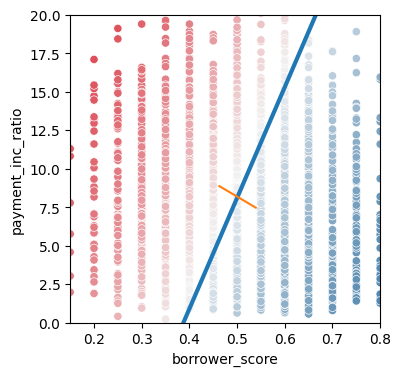

In [17]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

center = np.mean(loan_lda.means_, axis=0)
slope = - loan_lda.scalings_[0] / loan_lda.scalings_[1]
intercept = center[1] - center[0] * slope

x_0 = (0 - intercept) / slope
x_20 = (20 - intercept) / slope

lda_df = pd.concat([loan3000, pred['default']], axis=1)
lda_df.head()

fig, ax = plt.subplots(figsize=(4, 4))
g = sns.scatterplot(x='borrower_score', y='payment_inc_ratio', hue='default', data=lda_df, palette=sns.diverging_palette(240, 10, n=9, as_cmap=True), ax=ax, legend=False)

ax.set_ylim(0, 20)
ax.set_xlim(0.15, 0.8)
ax.plot((x_0, x_20), (0, 20), linewidth=3)
ax.plot(*loan_lda.means_.transpose())

In [5]:
from sklearn.linear_model import LogisticRegression

predictors = ['payment_inc_ratio', 'purpose_', 'home_', 'emp_len_', 'borrower_score']
outcome = 'outcome'
X = pd.get_dummies(loan_data[predictors], prefix='', prefix_sep='', drop_first=True, dtype=int)
y = loan_data[outcome]

logit_reg = LogisticRegression(penalty='l2', C=1e42, solver='liblinear')
logit_reg.fit(X, y)

LogisticRegression(C=1e+42, solver='liblinear')

In [6]:
pred = pd.DataFrame(logit_reg.predict_log_proba(X), columns=loan_data[outcome].cat.categories)
pred.describe()

,default,paid off
count,45342.000000,45342.000000
mean,-0.757850,-0.760423
std,0.378032,0.390419
min,-2.768873,-3.538865
25%,-0.985728,-0.977164
50%,-0.697366,-0.688946
75%,-0.472209,-0.467076
max,-0.029476,-0.064787


In [7]:
pred = pd.DataFrame(logit_reg.predict_proba(X), columns=loan_data[outcome].cat.categories)
pred.describe()

,default,paid off
count,45342.000000,45342.000000
mean,0.500001,0.499999
std,0.167336,0.167336
min,0.062733,0.029046
25%,0.373167,0.376377
50%,0.497895,0.502105
75%,0.623623,0.626833
max,0.970954,0.937267


In [8]:
import statsmodels.api as sm

y_numbers = [1 if yi == 'default' else 0 for yi in y]
logit_reg_sm = sm.GLM(y_numbers, X.assign(const=1), family=sm.families.Binomial())
logit_result = logit_reg_sm.fit()
logit_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                45342
Model:                            GLM   Df Residuals:                    45330
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -28757.
Date:                Mon, 26 May 2025   Deviance:                       57515.
Time:                        00:33:42   Pearson chi2:                 4.54e+04
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1112
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
payment_inc_ratio      0.0797      0.002     32.058      0.000       0.075       0.085
borrower_score        -4.6126      0.084    -55.203      0.000      -4.776      -4.449
debt_consolidation     0.2494      0.028      9.030      0.000       0.195       0.303
home_improvement       0.4077      0.047      8.747      0.000       0.316       0.499
major_purchase         0.2296      0.054      4.277      0.000       0.124       0.335
medical                0.5105      0.087      5.882      0.000       0.340       0.681
other                  0.6207      0.039     15.738      0.000       0.543       0.698
small_business         1.2153      0.063     19.192      0.000       1.091       1.339
OWN                    0.0483      0.038      1.271      0.204      -0.026       0.123
RENT                   0.1573      0.021      7.420      0.000       0.116       0.199
 > 1 Year             -0.3567      0.053     -6.779      0.000      -0.460      -0.254
const                  1.6381      0.074     22.224      0.000       1.494       1.783
======================================================================================
"""

In [9]:
import statsmodels.formula.api as smf

formula = ('outcome ~ bs(payment_inc_ratio, df=4) + purpose_ + home_ + emp_len_ + bs(borrower_score, df=4)')
model = smf.glm(formula=formula, data=loan_data, family=sm.families.Binomial())
results = model.fit()

In [11]:
import numpy as np

pred = logit_reg.predict(X)
pred_y = logit_reg.predict(X) == 'default'
true_y = y == 'default'
true_pos = true_y & pred_y
true_neg = ~true_y & ~pred_y
false_pos = ~true_y & pred_y
false_neg = true_y & ~pred_y

conf_mat = pd.DataFrame([[np.sum(true_pos), np.sum(false_neg)],
                         [np.sum(false_pos), np.sum(true_neg)]],
                         index=['Y = default', 'Y = paid off'],
                         columns=['Yhat = default', 'Yhat = paid off'])
conf_mat

,Yhat = default,Yhat = paid off
Y = default,14336,8335
Y = paid off,8148,14523


In [12]:
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support

conf_mat = confusion_matrix(y, logit_reg.predict(X))
print('Precision', conf_mat[0, 0] / sum(conf_mat[:, 0]))
print('Recall', conf_mat[0, 0] / sum(conf_mat[0, :]))
print('Specificity', conf_mat[1, 1] / sum(conf_mat[1, :]))

precision_recall_fscore_support(y, logit_reg.predict(X), labels=['default', 'paid off'])

Precision 0.6376089663760897
Recall 0.6323496978518812
Specificity 0.6405981209474659


(array([0.63760897, 0.63535742]),
 array([0.6323497 , 0.64059812]),
 array([0.63496844, 0.63796701]),
 array([22671, 22671], dtype=int64))

Text(0, 0.5, 'recall')

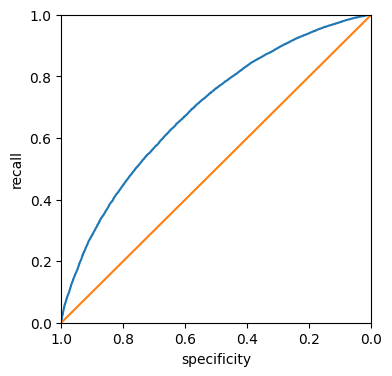

In [13]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y, logit_reg.predict_proba(X)[:, 0], pos_label='default')
roc_df = pd.DataFrame({'recall': tpr, 'specificity': 1 - fpr})

ax = roc_df.plot(x='specificity', y='recall', figsize=(4, 4), legend=False)
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
ax.plot((1, 0), (0, 1))
ax.set_xlabel('specificity')
ax.set_ylabel('recall')

In [14]:
from sklearn.metrics import roc_auc_score

print(np.sum(roc_df.recall[:-1] * np.diff(1 - roc_df.specificity)))
print(roc_auc_score([1 if yi == 'default' else 0 for yi in y], logit_reg.predict_proba(X)[:, 0]))

0.691710795288669
0.6917108731135808


In [16]:
full_train_set = pd.read_csv('data/full_train_set.csv.gz')

print('percentage of loans in default: ', 100 * np.mean(full_train_set.outcome == 'default'))

percentage of loans in default:  18.894546909248504


In [17]:
predictors = ['payment_inc_ratio', 'purpose_', 'home_', 'emp_len_', 'dti', 'revol_bal', 'revol_util']
outcome = 'outcome'

X = pd.get_dummies(full_train_set[predictors], prefix='', prefix_sep='', drop_first=True)
y = full_train_set[outcome]

full_model = LogisticRegression(penalty='l2', C=1e42, solver='liblinear')
full_model.fit(X, y)
print('percentage of loans predicted to default: ', 100 * np.mean(full_model.predict(X) == 'default'))

percentage of loans predicted to default:  0.0


In [18]:
default_wt = 1 / np.mean(full_train_set.outcome == 'default')
wt = [default_wt if outcome == 'default' else 1 for outcome in full_train_set.outcome]

full_model = LogisticRegression(penalty='l2', C=1e42, solver='liblinear')
full_model.fit(X, y, sample_weight=wt)
print('percentage of loans predicted to default (weighting): ', 100 * np.mean(full_model.predict(X) == 'default'))

percentage of loans predicted to default (weighting):  61.43998933217766


# 6. 통계적 머신러닝

In [5]:
from sklearn.neighbors import KNeighborsClassifier

loan200 = pd.read_csv('data/loan200.csv')

predictors = ['payment_inc_ratio', 'dti']
outcome = 'outcome'

newloan = loan200.loc[0:0, predictors]
X = loan200.loc[1:, predictors]
y = loan200.loc[1:, outcome]

knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X, y)
knn.predict(newloan)

array(['paid off'], dtype=object)

In [6]:
predictors = ['payment_inc_ratio', 'dti', 'revol_bal', 'revol_util']
outcome = 'outcome'

newloan = loan_data.loc[0:0, predictors]
X = loan_data.loc[1:, predictors]
y = loan_data.loc[1:, outcome]

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

nbrs = knn.kneighbors(newloan)
X.iloc[nbrs[1][0], :]

,payment_inc_ratio,dti,revol_bal,revol_util
35536,1.47212,1.46,1686,10.0
33651,3.38178,6.37,1688,8.4
25863,2.36303,1.39,1691,3.5
42953,1.28160,7.14,1684,3.9
43599,4.12244,8.98,1684,7.2


In [7]:
from sklearn.preprocessing import StandardScaler

newloan = loan_data.loc[0:0, predictors]
X = loan_data.loc[1:, predictors]
y = loan_data.loc[1:, outcome]

scaler = StandardScaler()
scaler.fit(X * 1.0)

X_std = scaler.transform(X * 1.0)
newloan_std = scaler.transform(newloan * 1.0)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_std, y)

nbrs = knn.kneighbors(newloan_std)
X.iloc[nbrs[1][0], :]

,payment_inc_ratio,dti,revol_bal,revol_util
2080,2.61091,1.03,1218,9.7
1438,2.34343,0.51,278,9.9
30215,2.71200,1.34,1075,8.5
28542,2.39760,0.74,2917,7.4
44737,2.34309,1.37,488,7.2


In [9]:
loan_data

,Unnamed: 0,status,loan_amnt,term,annual_inc,dti,payment_inc_ratio,revol_bal,revol_util,purpose,...,delinq_2yrs_zero,pub_rec_zero,open_acc,grade,outcome,emp_length,purpose_,home_,emp_len_,borrower_score
0,1,Charged Off,2500,60 months,30000,1.00,2.39320,1687,9.4,car,...,1,1,3,4.8,default,1,major_purchase,RENT,> 1 Year,0.65
1,2,Charged Off,5600,60 months,40000,5.55,4.57170,5210,32.6,small_business,...,1,1,11,1.4,default,5,small_business,OWN,> 1 Year,0.80
2,3,Charged Off,5375,60 months,15000,18.08,9.71600,9279,36.5,other,...,1,1,2,6.0,default,1,other,RENT,> 1 Year,0.60
3,4,Charged Off,9000,36 months,30000,10.08,12.21520,10452,91.7,debt_consolidation,...,1,1,4,4.2,default,1,debt_consolidation,RENT,> 1 Year,0.50
4,5,Charged Off,10000,36 months,100000,7.06,3.90888,11997,55.5,other,...,1,1,14,5.4,default,4,other,RENT,> 1 Year,0.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45337,45338,Fully Paid,8000,36 months,72000,18.97,4.57850,9725,58.2,credit_card,...,1,0,9,4.2,paid off,8,credit_card,RENT,> 1 Year,0.35
45338,45339,Fully Paid,2000,36 months,25200,13.24,3.20333,4925,40.7,wedding,...,0,1,13,4.2,paid off,3,other,MORTGAGE,> 1 Year,0.50
45339,45340,Fully Paid,4375,36 months,20000,7.95,9.98460,6574,73.0,debt_consolidation,...,1,1,8,2.4,paid off,1,debt_consolidation,MORTGAGE,> 1 Year,0.55
45340,45341,Fully Paid,8000,36 months,48000,26.91,6.45250,10303,32.4,debt_consolidation,...,1,1,10,5.2,paid off,1,debt_consolidation,MORTGAGE,> 1 Year,0.65


In [10]:
predictors = ['dti', 'revol_bal', 'revol_util', 'open_acc', 'delinq_2yrs_zero', 'pub_rec_zero']
outcome = 'outcome'

X = loan_data[predictors]
y = loan_data[outcome]

knn = KNeighborsClassifier(n_neighbors=20)

In [11]:
knn.fit(X, y)

loan_data['borrower_score'] = knn.predict_proba(X)[:, 1]
loan_data['borrower_score'].describe()

count    45342.000000
mean         0.498909
std          0.128728
min          0.050000
25%          0.400000
50%          0.500000
75%          0.600000
max          1.000000
Name: borrower_score, dtype: float64

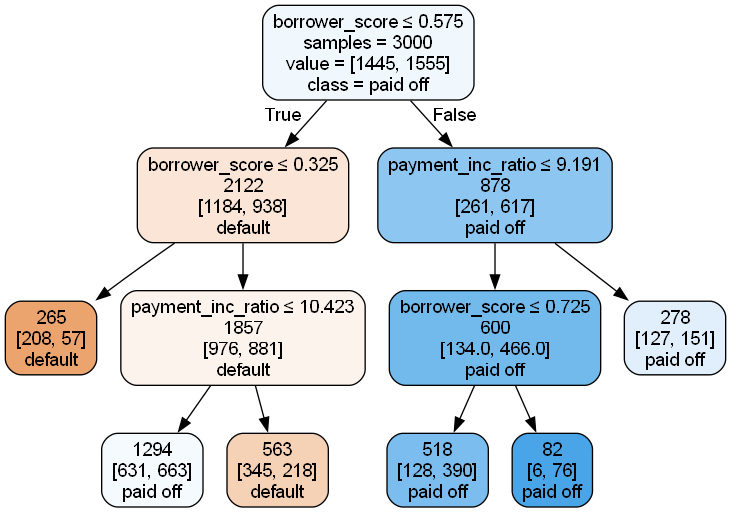

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from dmba import plotDecisionTree

loan3000 = pd.read_csv('data/loan3000.csv')

predictors = ['borrower_score', 'payment_inc_ratio']
outcome = 'outcome'

X = loan3000[predictors]
y = loan3000[outcome]

loan_tree = DecisionTreeClassifier(random_state=1, criterion='entropy', min_impurity_decrease=0.003)
loan_tree.fit(X, y)
plotDecisionTree(loan_tree, feature_names=predictors, class_names=loan_tree.classes_)

In [3]:
from dmba import textDecisionTree

print(textDecisionTree(loan_tree))

node=0 test node: go to node 1 if 0 <= 0.5750000178813934 else to node 6
  node=1 test node: go to node 2 if 0 <= 0.32500000298023224 else to node 3
    node=2 leaf node: [[0.785, 0.215]]
    node=3 test node: go to node 4 if 1 <= 10.42264986038208 else to node 5
      node=4 leaf node: [[0.488, 0.512]]
      node=5 leaf node: [[0.613, 0.387]]
  node=6 test node: go to node 7 if 1 <= 9.19082498550415 else to node 10
    node=7 test node: go to node 8 if 0 <= 0.7249999940395355 else to node 9
      node=8 leaf node: [[0.247, 0.753]]
      node=9 leaf node: [[0.073, 0.927]]
    node=10 leaf node: [[0.457, 0.543]]


In [4]:
from sklearn.ensemble import RandomForestClassifier

predictors = ['borrower_score', 'payment_inc_ratio']
outcome = 'outcome'

X = loan3000[predictors]
y = loan3000[outcome]

rf = RandomForestClassifier(n_estimators=500, random_state=1, oob_score=True)
rf.fit(X, y)

RandomForestClassifier(n_estimators=500, oob_score=True, random_state=1)

<Axes: xlabel='n'>

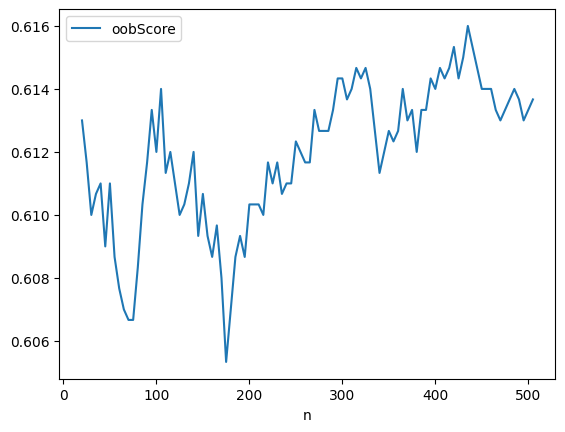

In [5]:
n_estimator = list(range(20, 510, 5))
oobScores = []
for n in n_estimator:
  rf = RandomForestClassifier(n_estimators=n, criterion='entropy', max_depth=5, random_state=1, oob_score=True)
  rf.fit(X, y)
  oobScores.append(rf.oob_score_)

df = pd.DataFrame({ 'n': n_estimator, 'oobScore': oobScores})
df.plot(x='n', y='oobScore')

In [6]:
predictions = X.copy()
predictions['prediction'] = rf.predict(X)
predictions.head()

,borrower_score,payment_inc_ratio,prediction
0,0.40,5.11135,default
1,0.40,5.43165,default
2,0.70,9.23003,paid off
3,0.40,2.33482,paid off
4,0.45,12.10320,default


Text(0, 0.5, 'payment_inc_ratio')

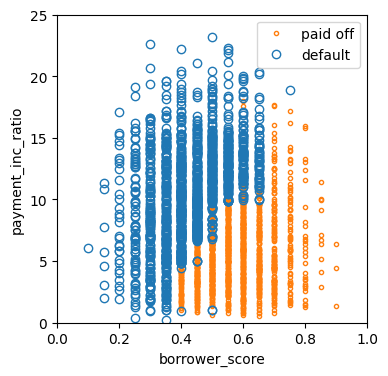

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(4, 4))

predictions.loc[predictions.prediction=='paid off'].plot(x='borrower_score', y='payment_inc_ratio', style='.', markerfacecolor='none', markeredgecolor='C1', ax=ax)
predictions.loc[predictions.prediction=='default'].plot(x='borrower_score', y='payment_inc_ratio', style='o', markerfacecolor='none', markeredgecolor='C0', ax=ax)
ax.legend(['paid off', 'default'])
ax.set_xlim(0, 1)
ax.set_ylim(0, 25)
ax.set_xlabel('borrower_score')
ax.set_ylabel('payment_inc_ratio')

In [14]:
predictors = ['loan_amnt', 'term', 'annual_inc', 'dti', 'payment_inc_ratio', 'revol_bal', 'revol_util', 'purpose', 'delinq_2yrs_zero', 'pub_rec_zero', 'open_acc', 'grade', 'emp_length', 'purpose_', 'home_', 'emp_len_', 'borrower_score']
outcome = 'outcome'

X = pd.get_dummies(loan_data[predictors], drop_first=True)
y = loan_data[outcome]

rf_all = RandomForestClassifier(n_estimators=500, random_state=1)
rf_all.fit(X, y)

RandomForestClassifier(n_estimators=500, random_state=1)

In [15]:
importances = rf_all.feature_importances_

In [16]:
importances

array([0.07998995, 0.09326785, 0.0991315 , 0.10579059, 0.0942328 ,
       0.09759648, 0.01099523, 0.00871262, 0.06732547, 0.09689576,
       0.05253653, 0.08750636, 0.0206617 , 0.00748052, 0.00766099,
       0.00364251, 0.0013268 , 0.0025287 , 0.00167231, 0.00142362,
       0.00443443, 0.00331226, 0.00109218, 0.00178106, 0.0075586 ,
       0.00391476, 0.00354768, 0.00166452, 0.00486864, 0.00335877,
       0.00751943, 0.01316393, 0.00340548])

In [19]:
from collections import defaultdict
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

rf = RandomForestClassifier(n_estimators=500)
scores = defaultdict(list)

for _ in range(3):
  train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.3)
  rf.fit(train_X, train_y)
  acc = metrics.accuracy_score(valid_y, rf.predict(valid_X))
  for column in X.columns:
    X_t = valid_X.copy()
    X_t[column] = np.random.permutation(X_t[column].values)
    shuff_acc = metrics.accuracy_score(valid_y, rf.predict(X_t))
    scores[column].append((acc-shuff_acc)/acc)

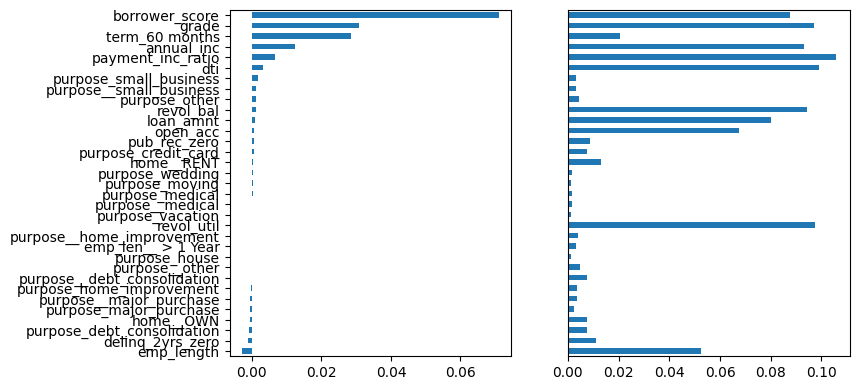

In [20]:
df = pd.DataFrame({
  'feature': X.columns,
  'Accuracy decrease': [np.mean(scores[column]) for column in X.columns],
  'Gini decrease': rf_all.feature_importances_,
})
df = df.sort_values('Accuracy decrease')

fig, axes = plt.subplots(ncols=2, figsize=(8, 4.5))
ax = df.plot(kind='barh', x = 'feature', y='Accuracy decrease', legend=False, ax=axes[0])
ax.set_ylabel('')

ax = df.plot(kind='barh', x='feature', y='Gini decrease', legend=False, ax=axes[1])
ax.set_ylabel('')
ax.get_yaxis().set_visible(False)

In [22]:
from xgboost import XGBClassifier

predictors = ['borrower_score', 'payment_inc_ratio']
outcome = 'outcome'

X = loan3000[predictors]
y = pd.Series([1 if o == 'default' else 0 for o in loan3000[outcome]])

xgb = XGBClassifier(objective='binary:logistic', subsample=0.63)
xgb.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
              max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
              n_estimators=100, n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.63, verbosity=1)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, feature_weights=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
              max_depth=3, max_leaves=None, min_child_weight=1, missing=None,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=1, nthread=None, ...)

In [23]:
xgb_df = X.copy()
xgb_df['prediction'] = ['default' if p == 1 else 'paid off' for p in xgb.predict(X)]
xgb_df['prob_default'] = xgb.predict_proba(X)[:, 0]
print(xgb_df.head())

   borrower_score  payment_inc_ratio prediction  prob_default
0            0.40            5.11135   paid off      0.732272
1            0.40            5.43165    default      0.326562
2            0.70            9.23003    default      0.381339
3            0.40            2.33482   paid off      0.848719
4            0.45           12.10320    default      0.082047


Text(0, 0.5, 'payment_inc_ratio')

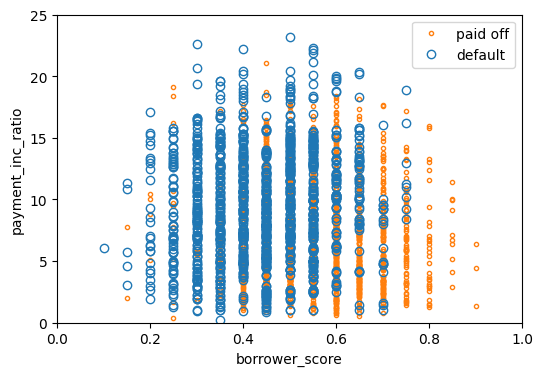

In [25]:
fig, ax = plt.subplots(figsize=(6,4))

xgb_df.loc[xgb_df.prediction=='paid off'].plot(
  x='borrower_score', y='payment_inc_ratio', style='.', markerfacecolor='none', markeredgecolor='C1', ax=ax
)
xgb_df.loc[xgb_df.prediction=='default'].plot(
  x='borrower_score', y='payment_inc_ratio', style='o', markerfacecolor='none', markeredgecolor='C0', ax=ax
)
ax.legend(['paid off', 'default'])
ax.set_xlim(0, 1)
ax.set_ylim(0, 25)
ax.set_xlabel('borrower_score')
ax.set_ylabel('payment_inc_ratio')

In [26]:
predictors = ['loan_amnt', 'term', 'annual_inc', 'dti', 'payment_inc_ratio', 'revol_bal', 'revol_util', 'purpose', 'delinq_2yrs_zero', 'pub_rec_zero', 'open_acc', 'grade', 'emp_length', 'purpose_', 'home_', 'emp_len_', 'borrower_score']
outcome = 'outcome'

X = pd.get_dummies(loan_data[predictors], drop_first=True)
y = pd.Series([1 if o == 'default' else 0 for o in loan_data[outcome]])

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=10000)

xgb_default = XGBClassifier(objective='binary:logistic', n_estimators=250, max_depth=6, reg_lambda=0, learning_rate=0.3, subsample=1)
xgb_default.fit(train_X, train_y)

pred_default = xgb_default.predict_proba(valid_X)[:, 1]
error_default = abs(valid_y - pred_default) > 0.5
print('default: ', np.mean(error_default))

default:  0.3534


In [27]:
xgb_penalty = XGBClassifier(objective='binary:logistic', n_estimators=250, max_depth=6, reg_lambda=1000, learning_rate=0.1, subsample=0.63)
xgb_penalty.fit(train_X, train_y)
pred_penalty = xgb_penalty.predict_proba(valid_X)[:, 1]
error_penalty = abs(valid_y - pred_penalty) > 0.5
print('penalty: ', np.mean(error_penalty))

penalty:  0.3252


In [30]:
results = []
for i in range(1, 250):
  train_default = xgb_default.predict_proba(train_X, iteration_range=(0,i))[:, 1]
  train_penalty = xgb_penalty.predict_proba(train_X, iteration_range=(0,i))[:, 1]
  pred_default = xgb_default.predict_proba(valid_X, iteration_range=(0,i))[:, 1]
  pred_penalty = xgb_penalty.predict_proba(valid_X, iteration_range=(0,i))[:, 1]
  results.append({
    'iterations': i,
    'default train': np.mean(abs(train_y - train_default) > 0.5),
    'penalty train': np.mean(abs(train_y - train_penalty) > 0.5),
    'default test': np.mean(abs(valid_y - pred_default) > 0.5),
    'penalty test': np.mean(abs(valid_y - pred_penalty) > 0.5),
  })

results = pd.DataFrame(results)
results.head()

,iterations,default train,penalty train,default test,penalty test
0,1,0.338181,0.346472,0.3491,0.3461
1,2,0.331277,0.337983,0.3391,0.3368
2,3,0.329099,0.336512,0.3373,0.3387
3,4,0.324430,0.336568,0.3395,0.3406
4,5,0.321063,0.337983,0.3386,0.3405


<Axes: xlabel='iterations'>

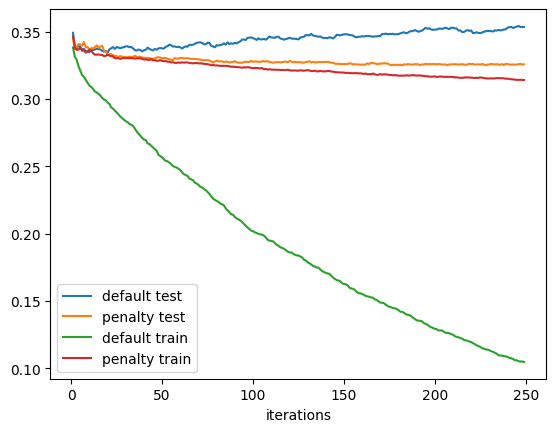

In [31]:
ax = results.plot(x='iterations', y='default test')
results.plot(x='iterations', y='penalty test', ax=ax)
results.plot(x='iterations', y='default train', ax=ax)
results.plot(x='iterations', y='penalty train', ax=ax)

In [32]:
from itertools import product

idx = np.random.choice(range(5), size=len(X), replace=True)
error = []
for eta, max_depth in product([0.1, 0.5, 0.9], [3, 6, 9]):
  xgb = XGBClassifier(objective='binary:logistic', n_estimators=250, max_depth=max_depth, learning_rate=eta)
  cv_error = []
  for k in range(5):
    fold_idx = idx == k
    train_X = X.loc[~fold_idx]
    train_y = y[~fold_idx]
    valid_X = X.loc[fold_idx]
    valid_y = y[fold_idx]

    xgb.fit(train_X, train_y)
    pred = xgb.predict_proba(valid_X)[:, 1]
    cv_error.append(np.mean(abs(valid_y - pred) > 0.5))

  error.append({
    'eta': eta,
    'max_depth': max_depth,
    'avg_error': np.mean(cv_error)
  })
  print(error[-1])

errors = pd.DataFrame(error)
errors

{'eta': 0.1, 'max_depth': 3, 'avg_error': 0.3291633131181941}
{'eta': 0.1, 'max_depth': 6, 'avg_error': 0.3366886471726317}
{'eta': 0.1, 'max_depth': 9, 'avg_error': 0.34707732031234684}
{'eta': 0.5, 'max_depth': 3, 'avg_error': 0.3386122272793761}
{'eta': 0.5, 'max_depth': 6, 'avg_error': 0.3709702865532186}
{'eta': 0.5, 'max_depth': 9, 'avg_error': 0.3739169697289782}
{'eta': 0.9, 'max_depth': 3, 'avg_error': 0.3519345570943921}
{'eta': 0.9, 'max_depth': 6, 'avg_error': 0.3886274748465941}
{'eta': 0.9, 'max_depth': 9, 'avg_error': 0.3823756498560344}


,eta,max_depth,avg_error
0,0.1,3,0.329163
1,0.1,6,0.336689
2,0.1,9,0.347077
3,0.5,3,0.338612
4,0.5,6,0.370970
5,0.5,9,0.373917
6,0.9,3,0.351935
7,0.9,6,0.388627
8,0.9,9,0.382376


# 7. 비지도 학습

In [1]:
import pandas as pd

sp500_px = pd.read_csv('data/sp500_data.csv.gz', index_col=0)
oil_px = sp500_px[['XOM', 'CVX']]

In [2]:
from sklearn.decomposition import PCA

pcs = PCA(n_components=2)
pcs.fit(oil_px)
loadings = pd.DataFrame(pcs.components_, columns=oil_px.columns)
loadings

,XOM,CVX
0,0.664711,0.747101
1,0.747101,-0.664711


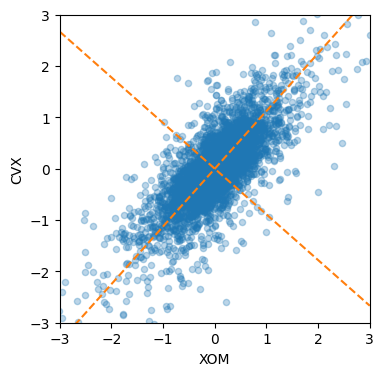

In [3]:
import numpy as np

def abline(slope, intercept, ax):
  x_vals = np.array(ax.get_xlim())
  return (x_vals, intercept + slope * x_vals)

ax = oil_px.plot.scatter(x='XOM', y='CVX', alpha=0.3, figsize=(4, 4))
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.plot(*abline(loadings.loc[0, 'CVX'] / loadings.loc[0, 'XOM'], 0, ax), '--', color='C1')
ax.plot(*abline(loadings.loc[1, 'CVX'] / loadings.loc[1, 'XOM'], 0, ax), '--', color='C1')

Text(0.5, 0, 'Component')

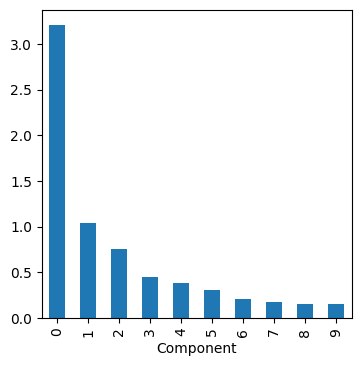

In [4]:
syms = sorted(['AAPL', 'MSFT', 'CSCO', 'INTC', 'CVX', 'XOM','SLB', 'COP', 'JPM', 'WFC', 'USB', 'AXP', 'WMT', 'TGT', 'HD', 'COST'])
top_sp = sp500_px.loc[sp500_px.index >= '2011-01-01', syms]

sp_pca = PCA()
sp_pca.fit(top_sp)

explained_variance = pd.DataFrame(sp_pca.explained_variance_)
ax = explained_variance.head(10).plot.bar(legend=False, figsize=(4, 4))
ax.set_xlabel('Component')

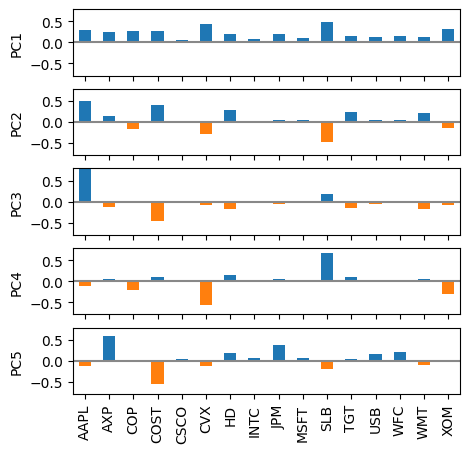

In [6]:
import matplotlib.pyplot as plt

loadings = pd.DataFrame(sp_pca.components_[0:5, :], columns=top_sp.columns)
maxPC = 1.01 * np.max(np.max(np.abs(loadings.loc[0:5, :])))

f, axes = plt.subplots(5, 1, figsize=(5, 5), sharex=True)
for i, ax in enumerate(axes):
  pc_loadings = loadings.loc[i, :]
  colors = ['C0' if l > 0 else 'C1' for l in pc_loadings]
  ax.axhline(color='#888888')
  pc_loadings.plot.bar(ax=ax, color=colors)
  ax.set_ylabel(f'PC{i+1}')
  ax.set_ylim(-maxPC, maxPC)

In [7]:
from sklearn.cluster import KMeans

df = sp500_px.loc[sp500_px.index >= '2011-01-01', ['XOM', 'CVX']]
kmeans = KMeans(n_clusters=4).fit(df)

In [8]:
df['clusters'] = kmeans.labels_

In [9]:
df.head()

,XOM,CVX,clusters
2011-01-03,0.736805,0.240681,3
2011-01-04,0.168668,-0.584516,1
2011-01-05,0.026631,0.446985,3
2011-01-06,0.248558,-0.919751,1
2011-01-07,0.337329,0.180511,3


In [10]:
centers = pd.DataFrame(kmeans.cluster_centers_, columns=['XOM', 'CVX'])
centers

,XOM,CVX
0,0.927032,1.346412
1,-0.330814,-0.574398
2,-1.144397,-1.757796
3,0.231540,0.316965


<Axes: xlabel='XOM', ylabel='CVX'>

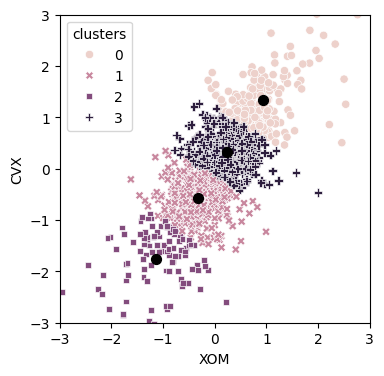

In [13]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(4,4))
ax = sns.scatterplot(x='XOM', y='CVX', hue='clusters', style='clusters', ax=ax, data=df)
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
centers.plot.scatter(x='XOM', y='CVX', ax=ax, s=50, color='black')

In [14]:
syms = sorted(['AAPL', 'MSFT', 'CSCO', 'INTC', 'CVX', 'XOM', 'SLB', 'COP', 'JPM', 'WFC', 'USB', 'AXP', 'WMT', 'TGT', 'HD', 'COST'])
top_sp = sp500_px.loc[sp500_px.index >= '2011-01-01', syms]
kmeans = KMeans(n_clusters=5).fit(top_sp)

In [15]:
from collections import Counter
Counter(kmeans.labels_)

Counter({2: 413, 4: 212, 0: 186, 1: 204, 3: 116})

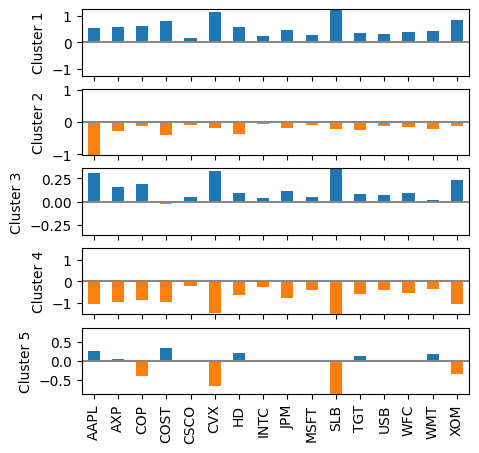

In [16]:
centers = pd.DataFrame(kmeans.cluster_centers_, columns=syms)

f, axes = plt.subplots(5, 1, figsize=(5, 5), sharex=True)
for i, ax in enumerate(axes):
  center = centers.loc[i, :]
  maxPC = 1.01 * np.max(np.max(np.abs(center)))
  colors = ['C0' if l > 0 else 'C1' for l in center]
  ax.axhline(color='#888888')
  center.plot.bar(ax=ax, color=colors)
  ax.set_ylabel(f'Cluster {i + 1}')
  ax.set_ylim(-maxPC, maxPC)

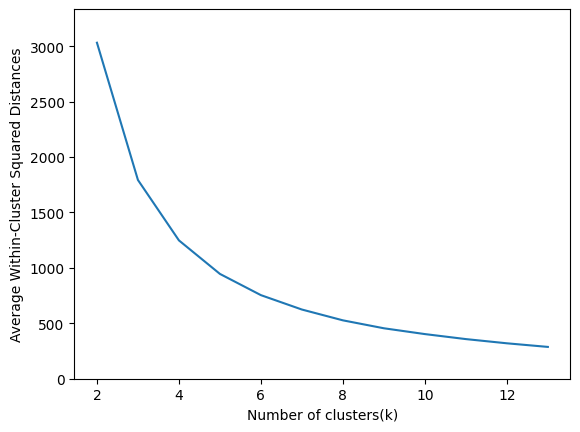

In [17]:
inertia = []
for n_clusters in range(2, 14):
  kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(top_sp)
  inertia.append(kmeans.inertia_ / n_clusters)

inertias = pd.DataFrame({'n_clusters': range(2, 14), 'inertia': inertia})
ax = inertias.plot(x='n_clusters', y='inertia')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
ax.legend().set_visible(False)

In [ ]:
from scipy.cluster.hierarchy import linkage

syms1 = ['AAPL', 'AMZN', 'AXP', 'COP', 'COST', 'CSCO', 'CVX', 'GOOGL', 'HD', 'INTC', 'JPM', 'MSFT', 'SLB', 'TGT', 'USB', 'WFC', 'WMT', 'XOM']
df = sp500_px.loc[sp500_px.index >= '2011-01-01', syms1].transpose()

Z = linkage(df, method='complete')

In [19]:
Z

array([[ 14.        ,  15.        ,   8.59490731,   2.        ],
       [  5.        ,   9.        ,   8.70726095,   2.        ],
       [ 11.        ,  19.        ,  11.43861911,   3.        ],
       [ 18.        ,  20.        ,  13.54055199,   5.        ],
       [ 10.        ,  21.        ,  17.54262662,   6.        ],
       [ 13.        ,  16.        ,  18.30670621,   2.        ],
       [  3.        ,  17.        ,  18.96087019,   2.        ],
       [ 22.        ,  23.        ,  21.31534597,   8.        ],
       [  6.        ,  24.        ,  22.85872694,   3.        ],
       [  2.        ,  25.        ,  24.02785309,   9.        ],
       [  8.        ,  27.        ,  25.49676797,  10.        ],
       [  4.        ,  28.        ,  29.1889513 ,  11.        ],
       [ 12.        ,  26.        ,  31.15301738,   4.        ],
       [  0.        ,  29.        ,  38.98012839,  12.        ],
       [ 30.        ,  31.        ,  43.24155434,  16.        ],
       [  1.        ,  32

Text(0, 0.5, 'distance')

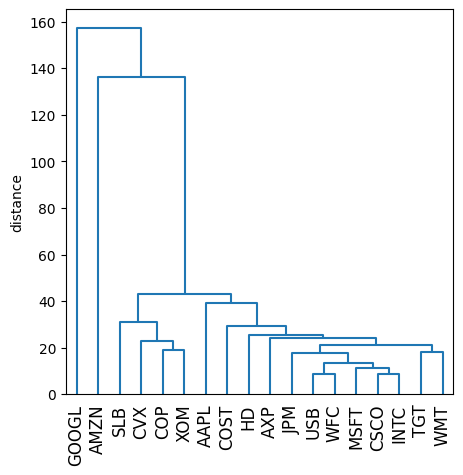

In [20]:
from scipy.cluster.hierarchy import dendrogram

fig, ax = plt.subplots(figsize=(5, 5))
dendrogram(Z, labels=list(df.index), color_threshold=0)
plt.xticks(rotation=90)
ax.set_ylabel('distance')

In [22]:
from scipy.cluster.hierarchy import fcluster

memb = fcluster(Z, 4, criterion='maxclust')
memb = pd.Series(memb, index=df.index)
for key, item in memb.groupby(memb):
  print(f'{key} : {", ".join(item.index)}')

1 : COP, CVX, SLB, XOM
2 : AAPL, AXP, COST, CSCO, HD, INTC, JPM, MSFT, TGT, USB, WFC, WMT
3 : AMZN
4 : GOOGL


In [23]:
from sklearn.mixture import GaussianMixture

df = sp500_px.loc[sp500_px.index >= '2011-01-01', ['XOM', 'CVX']]
mclust = GaussianMixture(n_components=2).fit(df)
mclust.bic(df)

4589.320317053261

(-3.0, 3.0)

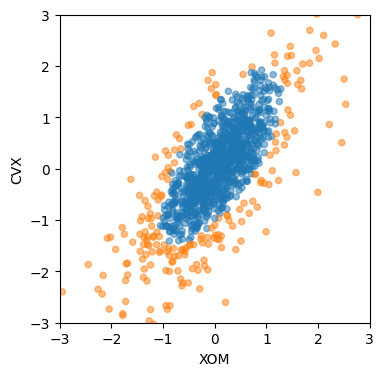

In [24]:
fig, ax = plt.subplots(figsize=(4, 4))
colors = [f'C{c}' for c in mclust.predict(df)]
df.plot.scatter(x='XOM', y='CVX', c=colors, alpha=0.5, ax=ax)
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)

In [25]:
print('Mean')
print(mclust.means_)
print('Covariances')
print(mclust.covariances_)

Mean
[[ 0.0709161   0.10228006]
 [-0.05074943 -0.21539465]]
Covariances
[[[0.27074158 0.27800893]
  [0.27800893 0.5212865 ]]

 [[0.98668327 0.99350046]
  [0.99350046 1.69695919]]]


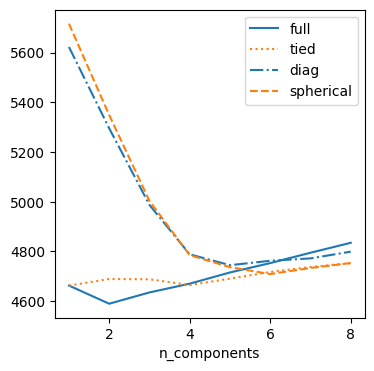

In [26]:
results = []
covariance_types = ['full', 'tied', 'diag', 'spherical']
for n_components in range(1, 9):
  for covariance_type in covariance_types:
    mclust = GaussianMixture(n_components=n_components, warm_start=True, covariance_type=covariance_type)
    mclust.fit(df)
    results.append({
      'bic': mclust.bic(df),
      'n_components': n_components,
      'covariance_type': covariance_type,
    })

results = pd.DataFrame(results)

colors = ['C0', 'C1', 'C2', 'C3']
styles = ['C0-', 'C1:', 'C0-.', 'C1--']

fig, ax = plt.subplots(figsize=(4, 4))
for i, covariance_type in enumerate(covariance_types):
  subset = results.loc[results.covariance_type == covariance_type, :]
  subset.plot(x='n_components', y='bic', ax=ax, label=covariance_type, kind='line', style=styles[i])

In [28]:
loan_data = pd.read_csv('data/loan_data.csv.gz')

defaults = loan_data.loc[loan_data['outcome'] == 'default']

In [29]:
columns = ['loan_amnt', 'annual_inc', 'revol_bal', 'open_acc', 'dti', 'revol_util']

df = defaults[columns]
kmeans = KMeans(n_clusters=4, random_state=1).fit(df)
counts = Counter(kmeans.labels_)

centers = pd.DataFrame(kmeans.cluster_centers_, columns=columns)
centers['size'] = [counts[i] for i in range(4)]
centers

,loan_amnt,annual_inc,revol_bal,open_acc,dti,revol_util,size
0,17809.760881,78669.452556,18933.405997,11.594003,17.016428,62.183810,7906
1,21444.318867,148736.057263,33152.689572,12.376733,13.831145,63.151084,1654
2,24290.909091,409746.465909,84710.988636,13.431818,8.148636,60.015647,88
3,10274.160906,41241.205530,9950.095008,9.480338,17.718588,57.903425,13023


In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df0 = scaler.fit_transform(df * 1.0)

kmeans = KMeans(n_clusters=4, random_state=1).fit(df0)
counts = Counter(kmeans.labels_)

centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=columns)
centers['size'] = [counts[i] for i in range(4)]
centers

,loan_amnt,annual_inc,revol_bal,open_acc,dti,revol_util,size
0,13484.728906,55907.993263,16435.803337,14.322265,24.211535,59.463608,6244
1,25950.205142,116834.142232,32945.972921,12.396335,16.165914,66.123542,3670
2,10507.283093,51117.994063,11635.285252,7.509513,15.931561,77.795077,7397
3,10324.846369,53456.824767,6054.819926,8.664618,11.312983,30.999874,5360


Text(0.5, 0, 'Component')

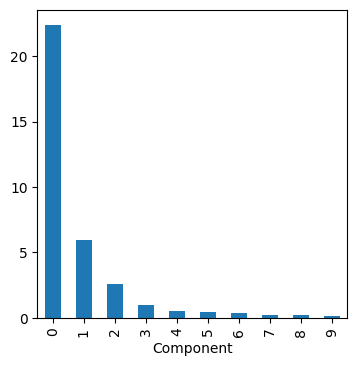

In [31]:
syms = ['GOOGL', 'AMZN', 'AAPL', 'MSFT', 'CSCO', 'INTC', 'CVX', 'XOM', 'SLB', 'COP', 'JPM', 'WFC', 'USB', 'AXP', 'WMT', 'TGT', 'HD', 'COST']
top_sp1 = sp500_px.loc[sp500_px.index >= '2005-01-01', syms]

sp_pca1 = PCA()
sp_pca1.fit(top_sp1)

explained_variance = pd.DataFrame(sp_pca1.explained_variance_)
ax = explained_variance.head(10).plot.bar(legend=False, figsize=(4,4))
ax.set_xlabel('Component')

In [32]:
loadings = pd.DataFrame(sp_pca1.components_[0:2, :], columns=top_sp1.columns)
loadings.transpose()

,0,1
GOOGL,0.857310,-0.477873
AMZN,0.444728,0.874149
AAPL,0.071627,0.020802
MSFT,0.036002,0.006204
CSCO,0.029205,0.003045
INTC,0.026666,0.006069
CVX,0.089548,0.037420
XOM,0.080336,0.020511
SLB,0.110218,0.030356
COP,0.057739,0.024117


In [33]:
columns = ['dti', 'payment_inc_ratio', 'home_', 'pub_rec_zero']
df = pd.get_dummies(defaults[columns])

scaler = StandardScaler()
df0 = scaler.fit_transform(df * 1.0)
kmeans = KMeans(n_clusters=4, random_state=1).fit(df0)
centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=df.columns)
centers

,dti,payment_inc_ratio,pub_rec_zero,home__MORTGAGE,home__OWN,home__RENT
0,21.431365,12.354001,0.943315,6.605827e-15,-9.159340e-16,1.000000e+00
1,12.743276,5.918701,0.900372,7.382983e-15,-9.992007e-16,1.000000e+00
2,17.339786,8.353535,0.905716,1.000000e+00,-1.304512e-15,1.354472e-14
3,17.197993,9.266666,0.917903,-1.443290e-15,1.000000e+00,8.326673e-16
